Работу выполнила Алина Мусина

### LDA

### Содержание

- [Введение. Анализ таблицы.](#ch1)
- [Анализ таблицы 1](#ch2)
- [Анализ таблицы 2](#ch3)
- [Анализ таблицы 3](#ch4)
- [Анализ таблицы 4](#ch5)
- [Анализ таблицы 5](#ch6)
- [Анализ таблицы 6](#ch7)
- [Вывод](#ch9)

### Введение. Анализ таблицы <a class="anchor" id="ch1"></a>

Какая наша задача? Нам нужно выделить основные темы отзывов компании Telecom. Для этого мы используем алгоритм LDA (латентный семантический анализ). Подход LDA к тематическому моделированию заключается в том, что каждый документ рассматривается как набор тем в определенной пропорции. И каждая тема как набор ключевых слов, опять же, в определенной пропорции. После того, как вы укажете алгоритму количество тем, все, что он сделает, — это отобразит распределение тем в документах и распределение ключевых слов по темам. Тема — это не что иное, как набор доминирующих ключевых слов. Просто взглянув на ключевые слова, вы сможете определить, о чем эта тема.

In [179]:
#loading the libraries 
import pandas as pd
import spacy


import sys
# !{sys.executable} -m spacy download en
import re, numpy as np, pandas as pd
from pprint import pprint

# Gensim
import gensim, spacy, logging, warnings
import gensim.corpora as corpora
from gensim.utils import lemmatize, simple_preprocess
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", 150) 
pd.set_option("display.max_rows", 140)
pd.options.display.max_colwidth = 1000

In [180]:
# считываем эксель файл
df = pd.read_excel("/Users/alina/Downloads/Telecom.xlsx")
df.head()

,Text,Operator,Type,ID
0,"Являюсь клиентом Оператор1а более 15 лет.За это время случались мелкие недоразумения, которые быстро и адекватно решались. Но эта ситуация (сама по себе не представляющая особой важности) меня удивила и поставила в тупик.05.03.2019 на мой телефон поступило SMS сообщение (спам) от организации, которой я не давал свой номер телефона и согласия на получение рекламы.Я переслал данное сообщение с указанием отправителя, даты и времени получения по номеру 007, предназначенному для борьбы со спамом. Также была сформирована и отправлена жалоба в ФАС РФ.Через некоторое время я получил следующий ответ от Оператор1а: «Уважаемый Клиент! Спасибо за Ваше обращение. Факт поступления указанного Вами сообщения не зафиксирован. Просим предоставить новые примеры. Благодарим за сотрудничество. С заботой о Вас, Ваш Оператор1».Честно говоря, я не понял, каким образом SMS сообщение, поступившее на мой телефон с номером оператора сотовой связи «Оператор1» может быть не зафиксировано оператором?Кроме того...",Оператор1,Мобильная связь,2
1,"Являюсь счастливым обладателем тарифа все для семьи, за сущие копейки получаю связь, интернет и телевидение. Все бы ничего, но трафик из пакета мобильного интернета (его у меня 10ГБ) расходуется все быстрее и быстрее. Заказав детализацию я понял, что основная доля списаний с моего счета идет по сессиям в 20 и 80 мб. Иногда такими пакетами расходуется до 1 Гб в день, что само по себе подозрительно, потому что обычно телефон качает не ровные цифры объема пакетов и они редко повторяются. Также подозрительно, что когда 10ГБ иссякают, скачка пакетов тоже сходит на нет, вместо """"лошадиных"""" закачек по 80мб остаются только редкие по 20мб. Хотя интернет-провайдер предоставляет без лимита, но на небольшой скорости... казалось бы качай дальше, если проблема с моей стороны и все дело в моих телефонах, подключенных к этому тарифу.Пусть оператор объяснит, куда уходит трафик, потому что есть основания полагать, что наш доблестный провайдер списывает таким нехитрым способом интернет, вынуждая док...",Оператор1,Мобильная связь,3
2,"Являюсь пользователем услуг сотовой связи компании вымпелком. По необходимости в работе были приобретены 4 сим-карты. Какое-то время пользовались, потом в один прекрасный день, я узнал, что мои сим-карты заблокированы, но это полбеды. На всех номерах был положительный баланс, в итоге сумма более 2500 рублей на моих лицевых счетах исчезли, и естественно доступ в личный кабинет заблокирован.90347***6390941***7496046***3590940***78По номеру 90347***63, было написано заявление в мини-офисе, но ответа так и не было. По номерам 90941***74, 96046***35, 90940***78 был запрос через сайт, но после вопроса как вернуть деньги, ответов не было.",Оператор1,Мобильная связь,4
3,"Являюсь пользователем сотового оператора Оператор1 уже 10 лет, но уже просто нет сил терпеть некачественное предоставление услуг, за которое и так платишь много средств, так они ещё и подключают платные услуги без оповещения. Ранее они улаживали такие нюансы у тех, кто вовремя замечал, а теперь при общении с сотрудником (с которым не так просто связаться теперь) обвинения идут в нашу сторону, что это мы подключаем сами или это сайты подключают, но Оператор1 к этому отношения не имеет. По версии сотрудников, наверно, нужно сидеть онлайн в личном кабинете и следить, чтобы ничего не подключилось (хотя, думаю, что в таком случае вины абонента будет ещё больше). Как хорошо, что теперь можно менять оператора без проблем и трудностей, да и новых абонентов, как показала практика, больше любят, а значит и обманывают меньше. Не будьте обманутыми не обогащайте неизвестно кого.",Оператор1,Мобильная связь,5
4,"Являюсь пользователем Оператор1а лет 10. Последние лет 5 номером практически не пользуюсь, т.к. на работе выдали корпоративный номер. Год назад заметил, что стали пропадать деньги со счета, оказалось молча подключили какую-то услугу и спокойно списывали 50 коп в день, мелочь, а неприятно, отключил на сайте. Сейчас смотрю с 

In [181]:
print(df.shape)

(21111, 4)


Таблица достаточно громоздкая, так что есть смысл разбить ее на несколько, но естественно не рандомно, а по типу оператора и связи.

In [182]:
df['Operator'].unique()

array(['Оператор1', 'Оператор2', 'Оператор3'], dtype=object)

In [183]:
df['Type'].unique()

array(['Мобильная связь', 'Интернет'], dtype=object)

Заметим, у нас есть несколько опреаторов и два вида связи: интернет и мобильная связь, поэтому есть смысл разбить наш объемный датасет на несколько таблиц, а точнее на 6 и каждую анализировать в отдельности. Но для начала уберем колонку ID, которая никак не поможет в нашем ананлизе и посмотрим на первый отзыв. 

In [184]:
del df['ID']

In [185]:
df.Text[0]

'Являюсь\xa0 клиентом Оператор1а более 15 лет.За это время случались мелкие недоразумения, которые быстро и адекватно решались. Но эта\xa0ситуация (сама по себе не представляющая особой важности) меня удивила и\xa0поставила в тупик.05.03.2019 на мой телефон поступило SMS сообщение (спам) от организации, которой я не давал свой номер телефона и согласия на получение рекламы.Я переслал\xa0 данное сообщение с указанием отправителя, даты и времени получения по номеру 007, предназначенному для борьбы со спамом. Также была сформирована и отправлена жалоба в ФАС РФ.Через некоторое время я получил следующий ответ от Оператор1а: «Уважаемый Клиент! Спасибо\xa0за Ваше обращение. Факт поступления указанного Вами сообщения не зафиксирован. Просим\xa0предоставить новые примеры. Благодарим за сотрудничество. С заботой о Вас, Ваш Оператор1».Честно говоря, я не понял, каким образом SMS сообщение, поступившее на мой телефон с номером оператора сотовой связи «Оператор1» может быть не зафиксировано операт

Заметимм, первый взятый нами отзыв достаточно длинный, что хорошо, у нас будет больше информации, а соответственно темы будут точнее. Проверим, если ли у нас пропущенные значения или пустые строки в нашей таблице. 

In [186]:
print('Количество пустых строк и пропущенных значений: {0}'.format(df['Text'].isnull().sum()))

Количество пустых строк и пропущенных значений: 0


In [187]:
df1 = (df.loc[(df['Operator'] == 'Оператор1')]).loc[(df['Type'] == 'Мобильная связь')]
df2 = (df.loc[(df['Operator'] == 'Оператор2')]).loc[(df['Type'] == 'Мобильная связь')]
df3 = (df.loc[(df['Operator'] == 'Оператор3')]).loc[(df['Type'] == 'Мобильная связь')]
df4 = (df.loc[(df['Operator'] == 'Оператор1')]).loc[(df['Type'] == 'Интернет')]
df5 = (df.loc[(df['Operator'] == 'Оператор2')]).loc[(df['Type'] == 'Интернет')]
df6 = (df.loc[(df['Operator'] == 'Оператор3')]).loc[(df['Type'] == 'Интернет')]

##### Что нам нужно для preprocessing LDA? 
- lemmatization 
- убрать стоп-слова
- удалить знаки препинания 
- сделать bigram (trigram)
- превратить каждое предложение в список слов


Для начала создадим список из stop_words, это слова, которые никак не влияют на смысл определнного отзыва, такие как "а", "не", "то" и так далее.

In [188]:
# Creating a stopwords list
import nltk
nltk.download("stopwords")

from nltk.corpus import stopwords
from pymystem3 import Mystem
from string import punctuation

mystem = Mystem() 
russian_stopwords = stopwords.words("russian")

[nltk_data] Error loading stopwords: <urlopen error [Errno 8] nodename
[nltk_data]     nor servname provided, or not known>


In [245]:
russian_stopwords

['и',
 'в',
 'во',
 'не',
 'что',
 'он',
 'на',
 'я',
 'с',
 'со',
 'как',
 'а',
 'то',
 'все',
 'она',
 'так',
 'его',
 'но',
 'да',
 'ты',
 'к',
 'у',
 'же',
 'вы',
 'за',
 'бы',
 'по',
 'только',
 'ее',
 'мне',
 'было',
 'вот',
 'от',
 'меня',
 'еще',
 'нет',
 'о',
 'из',
 'ему',
 'теперь',
 'когда',
 'даже',
 'ну',
 'вдруг',
 'ли',
 'если',
 'уже',
 'или',
 'ни',
 'быть',
 'был',
 'него',
 'до',
 'вас',
 'нибудь',
 'опять',
 'уж',
 'вам',
 'ведь',
 'там',
 'потом',
 'себя',
 'ничего',
 'ей',
 'может',
 'они',
 'тут',
 'где',
 'есть',
 'надо',
 'ней',
 'для',
 'мы',
 'тебя',
 'их',
 'чем',
 'была',
 'сам',
 'чтоб',
 'без',
 'будто',
 'чего',
 'раз',
 'тоже',
 'себе',
 'под',
 'будет',
 'ж',
 'тогда',
 'кто',
 'этот',
 'того',
 'потому',
 'этого',
 'какой',
 'совсем',
 'ним',
 'здесь',
 'этом',
 'один',
 'почти',
 'мой',
 'тем',
 'чтобы',
 'нее',
 'сейчас',
 'были',
 'куда',
 'зачем',
 'всех',
 'никогда',
 'можно',
 'при',
 'наконец',
 'два',
 'об',
 'другой',
 'хоть',
 'после',
 'на

### Анализ таблицы 1 <a class="anchor" id="ch3"></a>

Разделим каждое наше предложение на слова и получаем каждое предложение в виде списка слов. 

In [189]:
def sent_to_words(sentences):
    for sent in sentences:
        sent = re.sub('\S*@\S*\s?', '', sent)  # remove emails
        sent = re.sub('\s+', ' ', sent)  # remove newline chars
        sent = re.sub("\'", "", sent)  # remove single quotes
        sent = gensim.utils.simple_preprocess(str(sent), deacc=True) 
        yield(sent)  

# Convert to list
data = df1.Text.values.tolist()
data_words = list(sent_to_words(data))
print(data_words[:1])

<>:3: DeprecationWarning: invalid escape sequence \S
<>:4: DeprecationWarning: invalid escape sequence \s
<>:3: DeprecationWarning: invalid escape sequence \S
<>:4: DeprecationWarning: invalid escape sequence \s
<>:3: DeprecationWarning: invalid escape sequence \S
<>:4: DeprecationWarning: invalid escape sequence \s
<ipython-input-189-4e76ce5d806b>:3: DeprecationWarning: invalid escape sequence \S
  sent = re.sub('\S*@\S*\s?', '', sent)  # remove emails
<ipython-input-189-4e76ce5d806b>:4: DeprecationWarning: invalid escape sequence \s
  sent = re.sub('\s+', ' ', sent)  # remove newline chars


[['являюсь', 'клиентом', 'оператор', 'более', 'лет', 'за', 'это', 'время', 'случались', 'мелкие', 'недоразумения', 'которые', 'быстро', 'адекватно', 'решались', 'но', 'эта', 'ситуация', 'сама', 'по', 'себе', 'не', 'представляющая', 'особои', 'важности', 'меня', 'удивила', 'поставила', 'тупик', 'на', 'мои', 'телефон', 'поступило', 'sms', 'сообщение', 'спам', 'от', 'организации', 'которои', 'не', 'давал', 'свои', 'номер', 'телефона', 'согласия', 'на', 'получение', 'рекламы', 'переслал', 'данное', 'сообщение', 'указанием', 'отправителя', 'даты', 'времени', 'получения', 'по', 'номеру', 'для', 'борьбы', 'со', 'спамом', 'также', 'была', 'сформирована', 'отправлена', 'жалоба', 'фас', 'рф', 'через', 'некоторое', 'время', 'получил', 'следующии', 'ответ', 'от', 'оператор', 'уважаемыи', 'клиент', 'спасибо', 'за', 'ваше', 'обращение', 'факт', 'поступления', 'указанного', 'вами', 'сообщения', 'не', 'зафиксирован', 'просим', 'предоставить', 'новые', 'примеры', 'благодарим', 'за', 'сотрудничество', '

Дальше мы можем исследовать комбинации слов. N-граммы обычно показывают, какие N слов часто появляются вместе. 

In [190]:
from sklearn.feature_extraction.text import CountVectorizer
c_vec = CountVectorizer(stop_words=russian_stopwords, ngram_range=(2,3))
# matrix of ngrams
ngrams = c_vec.fit_transform(df1['Text'])
# count frequency of ngrams
count_values = ngrams.toarray().sum(axis=0)
# list of ngrams
vocab = c_vec.vocabulary_
df_ngram1 = pd.DataFrame(sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)
            ).rename(columns={0: 'frequency', 1:'bigram/trigram'})

In [191]:
df_ngram1.head()

,frequency,bigram/trigram
0,921,личном кабинете
1,810,вернуть деньги
2,750,добрый день
3,702,каждый день
4,689,сервис партнера


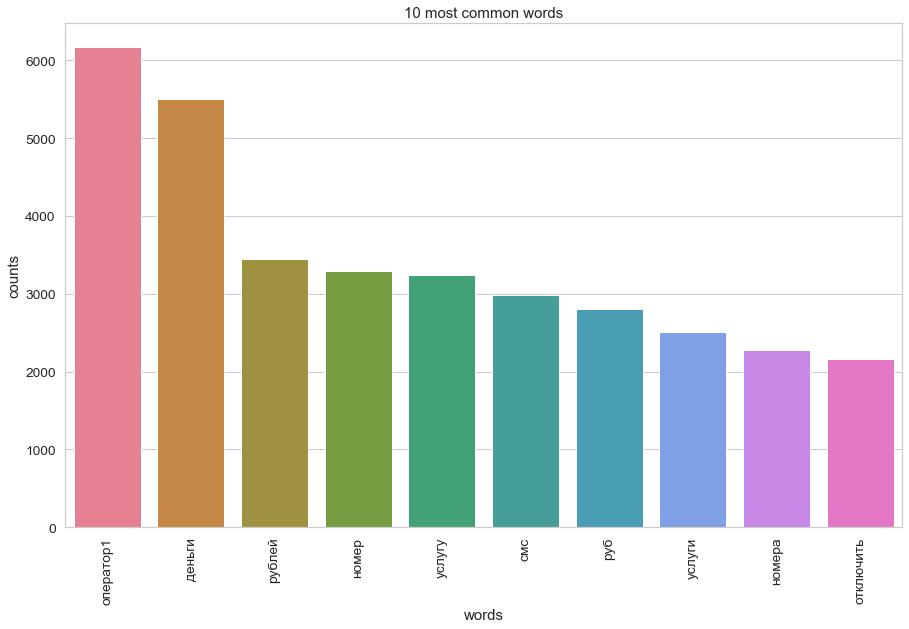

In [192]:
# Load the library with the CountVectorizer method
from stop_words import safe_get_stop_words
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words = safe_get_stop_words('ru'))
# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(df1['Text'])
# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

In [193]:
Самое частое встрчающееся слово оператор, также мы можем видеть, что у нас присуствует слово "номер" и "номера", значит, нам нужно будет проделать lemmatization.

SyntaxError: invalid syntax (<ipython-input-193-a83e0f1a53c0>, line 1)

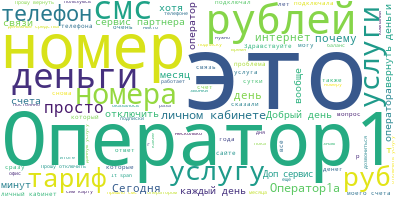

In [194]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(df1['Text'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue', stopwords = russian_stopwords)
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

По нарисованному вордклауду можно расширить наш список russian_stopwords например, словомо "Оператор1", мы итак знаем, что рассматриваемый нами датасет это оператор1. 

In [195]:
russian_stopwords.extend(['Оператор1', 'это', 'рублей', 'руб', 'почему', 'операторов', 'которым', 'мои', 'именно', 'просто', 'которым'])

In [196]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import LatentDirichletAllocation
tfidf_vectorizer = TfidfVectorizer(stop_words=russian_stopwords, ngram_range=(2,3))
lda = LatentDirichletAllocation(n_components=3)
pipe = make_pipeline(tfidf_vectorizer, lda)
pipe.fit(df1['Text'])
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += ", ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()
print_top_words(lda, tfidf_vectorizer.get_feature_names(), n_top_words=7)

/Users/alina/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['оператор1'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


Topic #0: отключить услугу, 90 дней, вернуть деньги, срок оплаты, оплаты 90, оплаты 90 дней, срок оплаты 90
Topic #1: каждый день, вернуть деньги, сервис партнера, личном кабинете, доп сервис, доп сервис партнера, прошу отключить
Topic #2: вернуть деньги, прошу отключить, доп сервис, сервис партнера, личном кабинете, отключить услугу, каждый день



Мы получили основные темы нашего первого датасета. Почему мы выбрали 3 топика? Вбирая большее количество тем, замечаем, что разница между ними достаточно маленькая, поэтому останавливаемся на оптимальном количестве 3. А теперь более подробно рассмотрим наш датасет, используя веса. 

In [238]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)
#import ru2

# !python3 -m spacy download en  # run in terminal once
def process_words(texts, stop_words=russian_stopwords, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """Remove Stopwords, Form Bigrams, Trigrams and Lemmatization"""
    texts = [[word for word in simple_preprocess(str(doc)) if word not in russian_stopwords] for doc in texts]
    texts = [bigram_mod[doc] for doc in texts]
    texts = [trigram_mod[bigram_mod[doc]] for doc in texts]
    texts_out = []
    nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner']) #ru2
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    # remove stopwords once more after lemmatization
    texts_out = [[word for word in simple_preprocess(str(doc)) if word not in russian_stopwords] for doc in texts_out]    
    return texts_out

data_ready = process_words(data_words)

In [198]:
id2word = corpora.Dictionary(data_ready)

# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in data_ready]

# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=3, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=10,
                                           passes=10,
                                           alpha='symmetric',
                                           iterations=100,
                                           per_word_topics=True)

pprint(lda_model.print_topics())

[(0,
  '0.085*"прошу" + 0.073*"номер" + 0.058*"деньги" + 0.037*"услугу" + '
  '0.035*"счета" + 0.027*"вернуть" + 0.012*"размере" + 0.011*"подписку" + '
  '0.011*"рублеи" + 0.009*"списали"'),
 (1,
  '0.128*"оператор" + 0.017*"услуг" + 0.016*"денег" + 0.012*"баланс" + '
  '0.011*"также" + 0.010*"компании" + 0.010*"давно" + 0.009*"договора" + '
  '0.009*"проблему" + 0.008*"спасибо"'),
 (2,
  '0.055*"ответ" + 0.024*"смс" + 0.015*"марта" + 0.008*"помочь" + '
  '0.008*"отключена" + 0.007*"говорят" + 0.007*"месяц" + 0.007*"сутки" + '
  '0.006*"вообще" + 0.006*"сеичас"')]


    Данный вывод показывает нам распределение 7 слов по темам и их вклад в определенную, свойственную им тему.

In [199]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']
    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data_words)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(40)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,2.0,0.8980,"ответ, смс, марта, помочь, отключена, говорят, месяц, сутки, вообще, сеичас","[являюсь, клиентом, оператор, более, лет, за, это, время, случались, мелкие, недоразумения, которые, быстро, адекватно, решались, но, эта, ситуация, сама, по, себе, не, представляющая, особои, важности, меня, удивила, поставила, тупик, на, мои, телефон, поступило, sms, сообщение, спам, от, организации, которои, не, давал, свои, номер, телефона, согласия, на, получение, рекламы, переслал, данное, сообщение, указанием, отправителя, даты, времени, получения, по, номеру, для, борьбы, со, спамом, также, была, сформирована, отправлена, жалоба, фас, рф, через, некоторое, время, получил, следующии, ответ, от, оператор, уважаемыи, клиент, спасибо, за, ваше, обращение, факт, поступления, указанного, вами, сообщения, не, зафиксирован, просим, предоставить, новые, примеры, благодарим, за, сотрудничество, заботои, вас, ваш, ...]"
1,1,1.0,0.5588,"оператор, услуг, денег, баланс, также, компании, давно, договора, проблему, спасибо","[являюсь, счастливым, обладателем, тарифа, все, для, семьи, за, сущие, копеики, получаю, связь, интернет, телевидение, все, бы, ничего, но, трафик, из, пакета, мобильного, интернета, его, меня, гб, расходуется, все, быстрее, быстрее, заказав, детализацию, понял, что, основная, доля, списании, моего, счета, идет, по, сессиям, мб, иногда, такими, пакетами, расходуется, до, гб, день, что, само, по, себе, подозрительно, потому, что, обычно, телефон, качает, не, ровные, цифры, объема, пакетов, они, редко, повторяются, также, подозрительно, что, когда, гб, иссякают, скачка, пакетов, тоже, сходит, на, нет, вместо, лошадиных, закачек, по, мб, остаются, только, редкие, по, мб, хотя, интернет, проваидер, предоставляет, без, лимита, но, на, небольшои, скорости, ...]"
2,2,1.0,0.5846,"оператор, услуг, денег, баланс, также, компании, давно, договора, проблему, спасибо","[являюсь, пользователем, услуг, сотовои, связи, компании, вымпелком, по, необходимости, работе, были, приобретены, сим, карты, какое, то, время, пользовались, потом, один, прекрасныи, день, узнал, что, мои, сим, карты, заблокированы, но, это, полбеды, на, всех, номерах, был, положительныи, баланс, итоге, сумма, более, рублеи, на, моих, лицевых, счетах, исчезли, естественно, доступ, личныи, кабинет, заблокирован, по, номеру, было, написано, заявление, мини, офисе, но, ответа, так, не, было, по, номерам, был, запрос, через, саит, но, после, вопроса, как, вернуть, деньги, ответов, не, было]"
3,3,1.0,0.8208,"оператор, услуг, денег, баланс, также, компании, давно, договора, проблему, спасибо","[являюсь, пользователем, сотового, оператора, оператор, уже, лет, но, уже, просто, нет, сил, терпеть, некачественное, предоставление, услуг, за, которое, так, платишь, много, средств, так, они, еще, подключают, платные, услуги, без, оповещения, ранее, они, улаживали, такие, нюансы, тех, кто, вовремя, замечал, теперь, при, общении, сотрудником, которым, не, так, просто, связаться, теперь, обвинения, идут, нашу, сторону, что, это, мы, подключаем, сами, или, это, саиты, подключают, но, оператор, этому, отношения, не, имеет, по, версии, сотрудников, наверно, нужно, сидеть, онлаин, личном, кабинете, следить, чтобы, ничего, не, подключилось, хотя, думаю, что, таком, случае, вины, абонента, будет, еще, больше, как, хорошо, что, теперь, можно, менять, оператора, без, ...]"
4,4,0.0,0.4603,"прошу, номер, деньги, услугу, счета, вернуть, размере, подписку, рублеи, списали","[являюсь, пользователем, оператор, лет, последние, лет, номером, практически, не, пользуюсь, на, работе, выдали, корпоративныи, номер, год, назад, заметил, что, стали, пропадать, деньги, со, счета, оказалось, молча, подключили, какую, то, услугу, спокоино, списывали, коп, день, мелочь, неприятно, отключил, на, саите, сеичас, смотрю, баланса, опять, пропало, лишним, рублеи, захожу, на, саит, посмотреть, детализацию, вижу, что, оператор, молча, перевел, мои, старыи, тар

Это таблица показывает нам тему, ее ключевые слова и предложения, свойственные ей. 

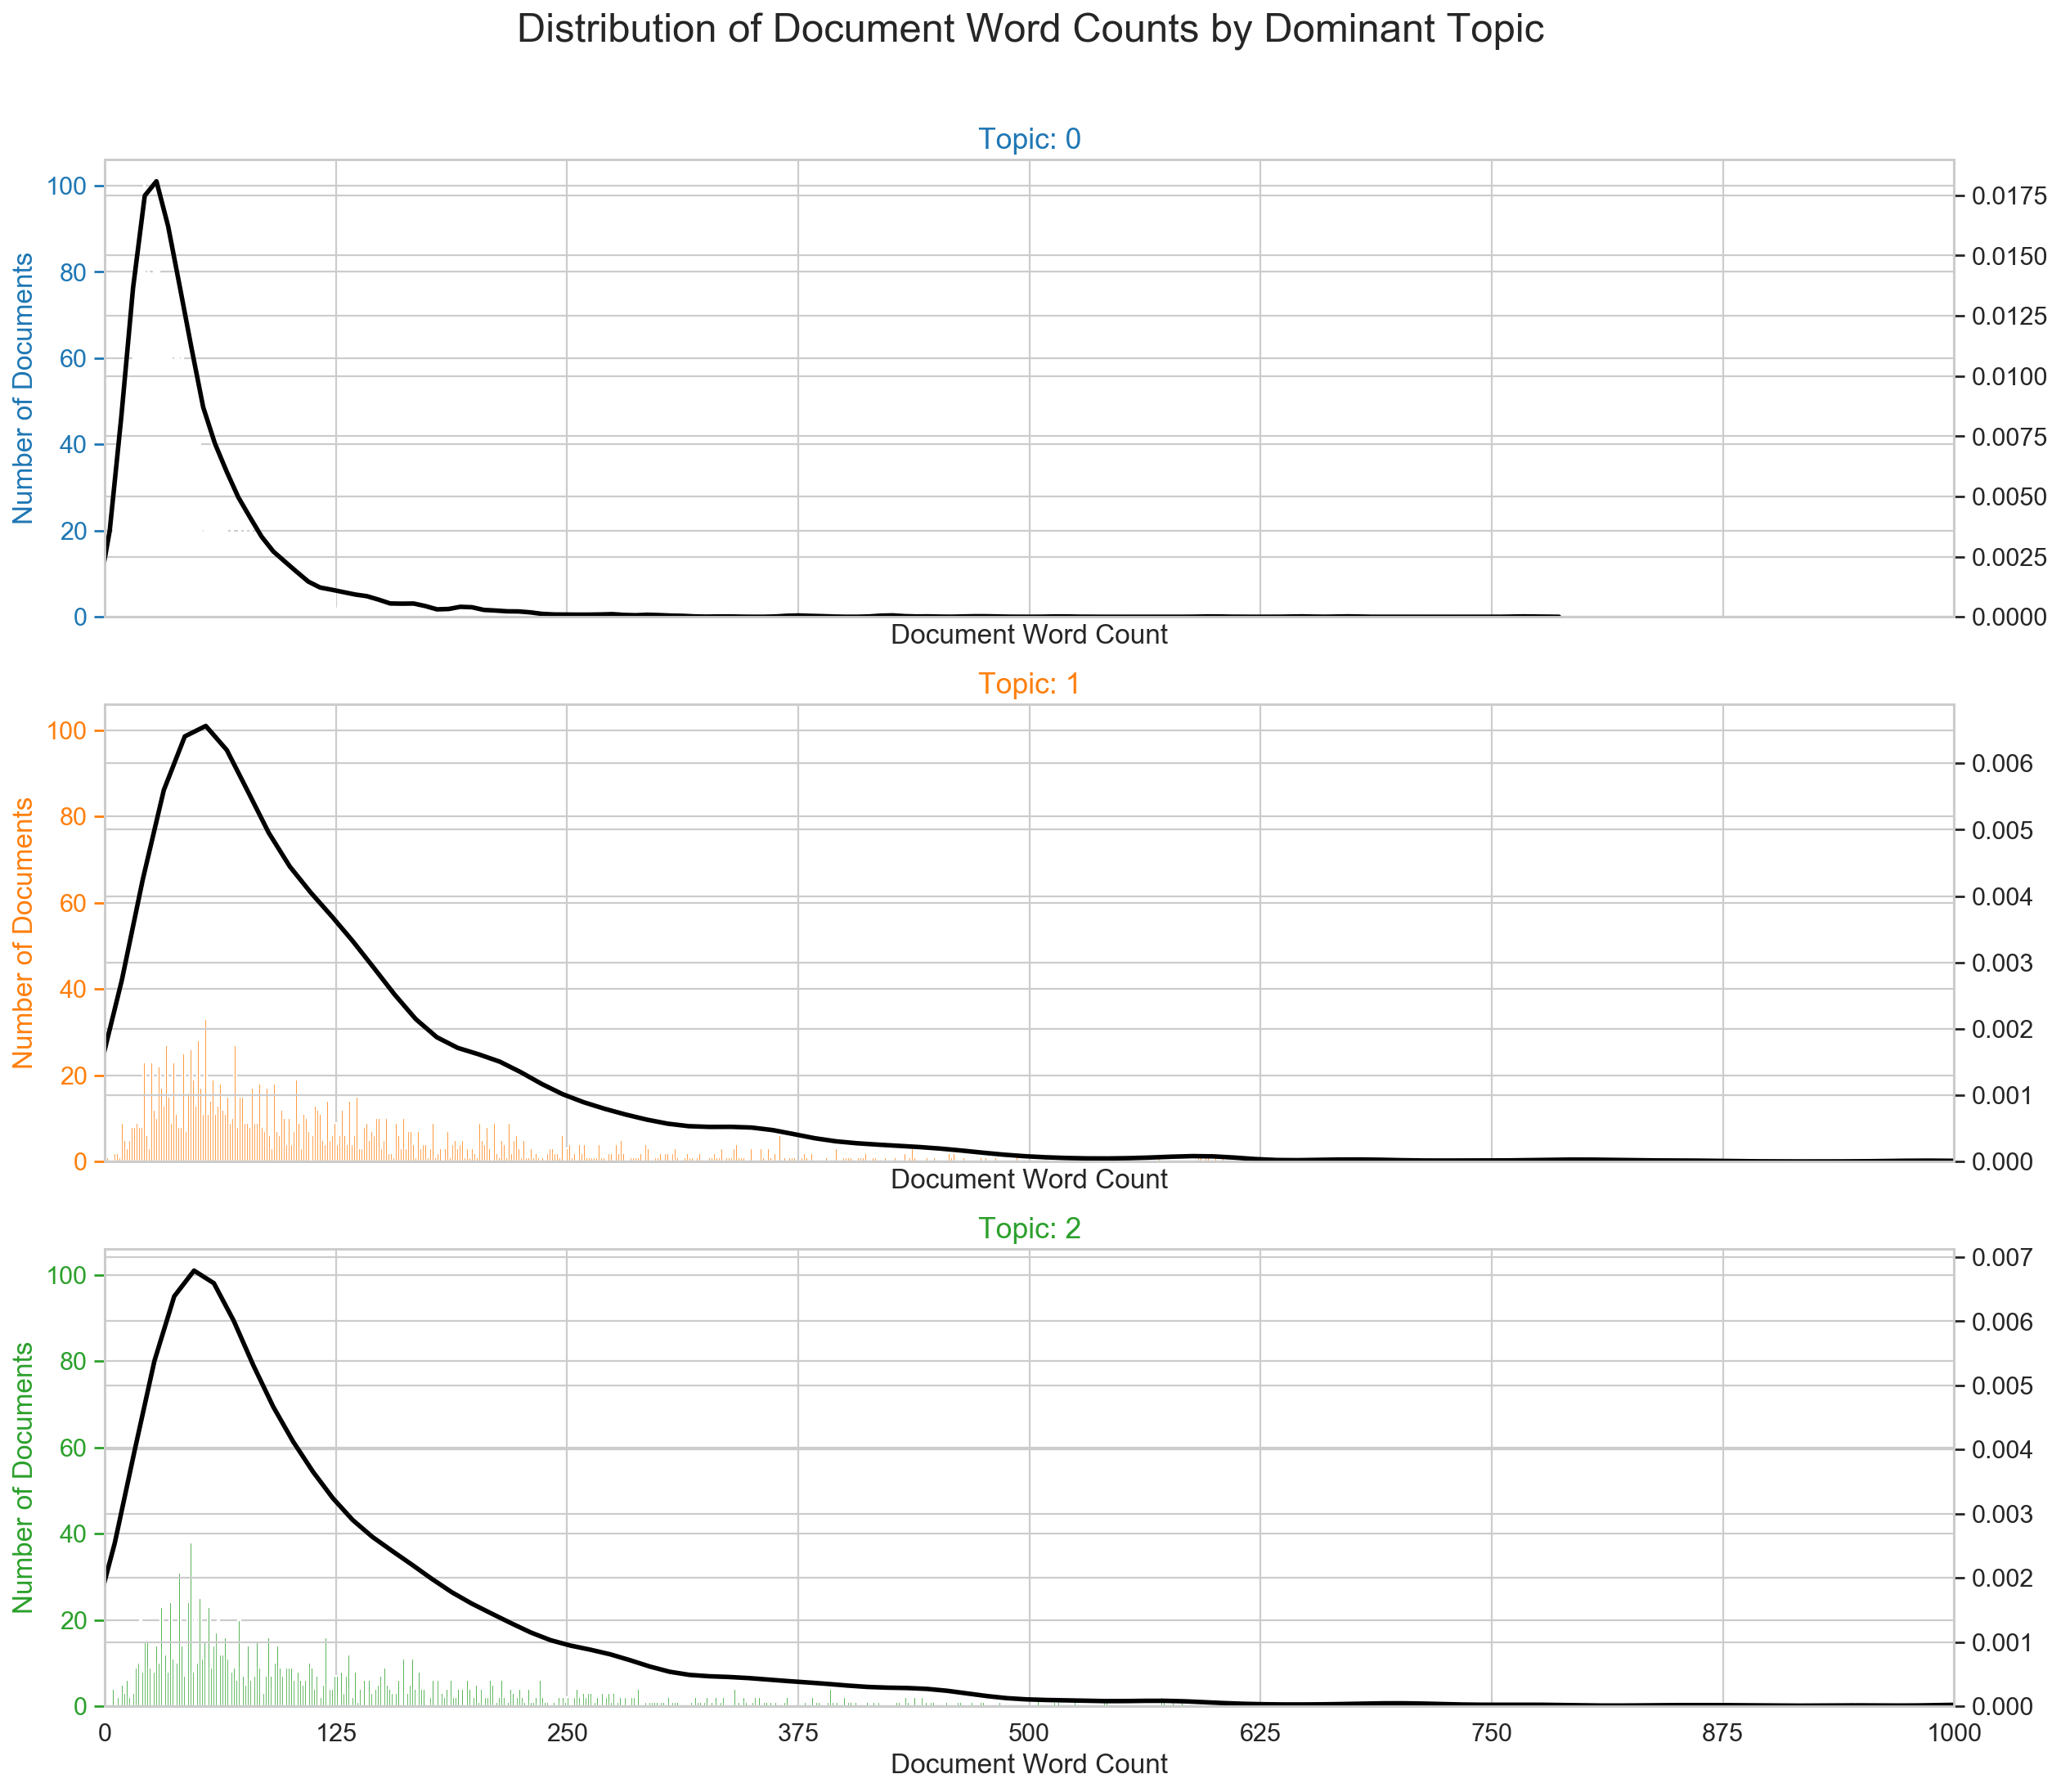

In [200]:
import seaborn as sns
import matplotlib.colors as mcolors
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

fig, axes = plt.subplots(3,1,figsize=(16,14), dpi=160, sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):    
    df_dominant_topic_sub = df_dominant_topic.loc[df_dominant_topic.Dominant_Topic == i, :]
    doc_lens = [len(d) for d in df_dominant_topic_sub.Text]
    ax.hist(doc_lens, bins = 1000, color=cols[i])
    ax.tick_params(axis='y', labelcolor=cols[i], color=cols[i])
    sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
    ax.set(xlim=(0, 1000), xlabel='Document Word Count')
    ax.set_ylabel('Number of Documents', color=cols[i])
    ax.set_title('Topic: '+str(i), fontdict=dict(size=16, color=cols[i]))

fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.xticks(np.linspace(0,1000,9))
fig.suptitle('Distribution of Document Word Counts by Dominant Topic', fontsize=22)
plt.show()

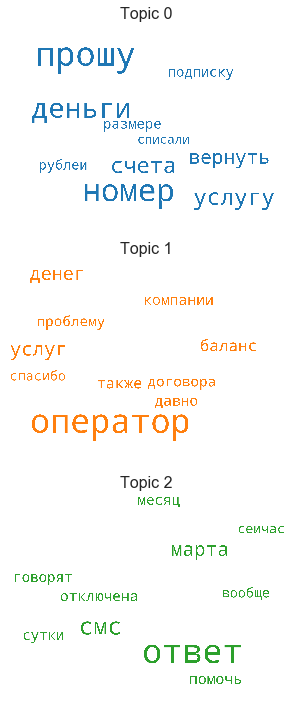

In [201]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=russian_stopwords,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(3, 1, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')
plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

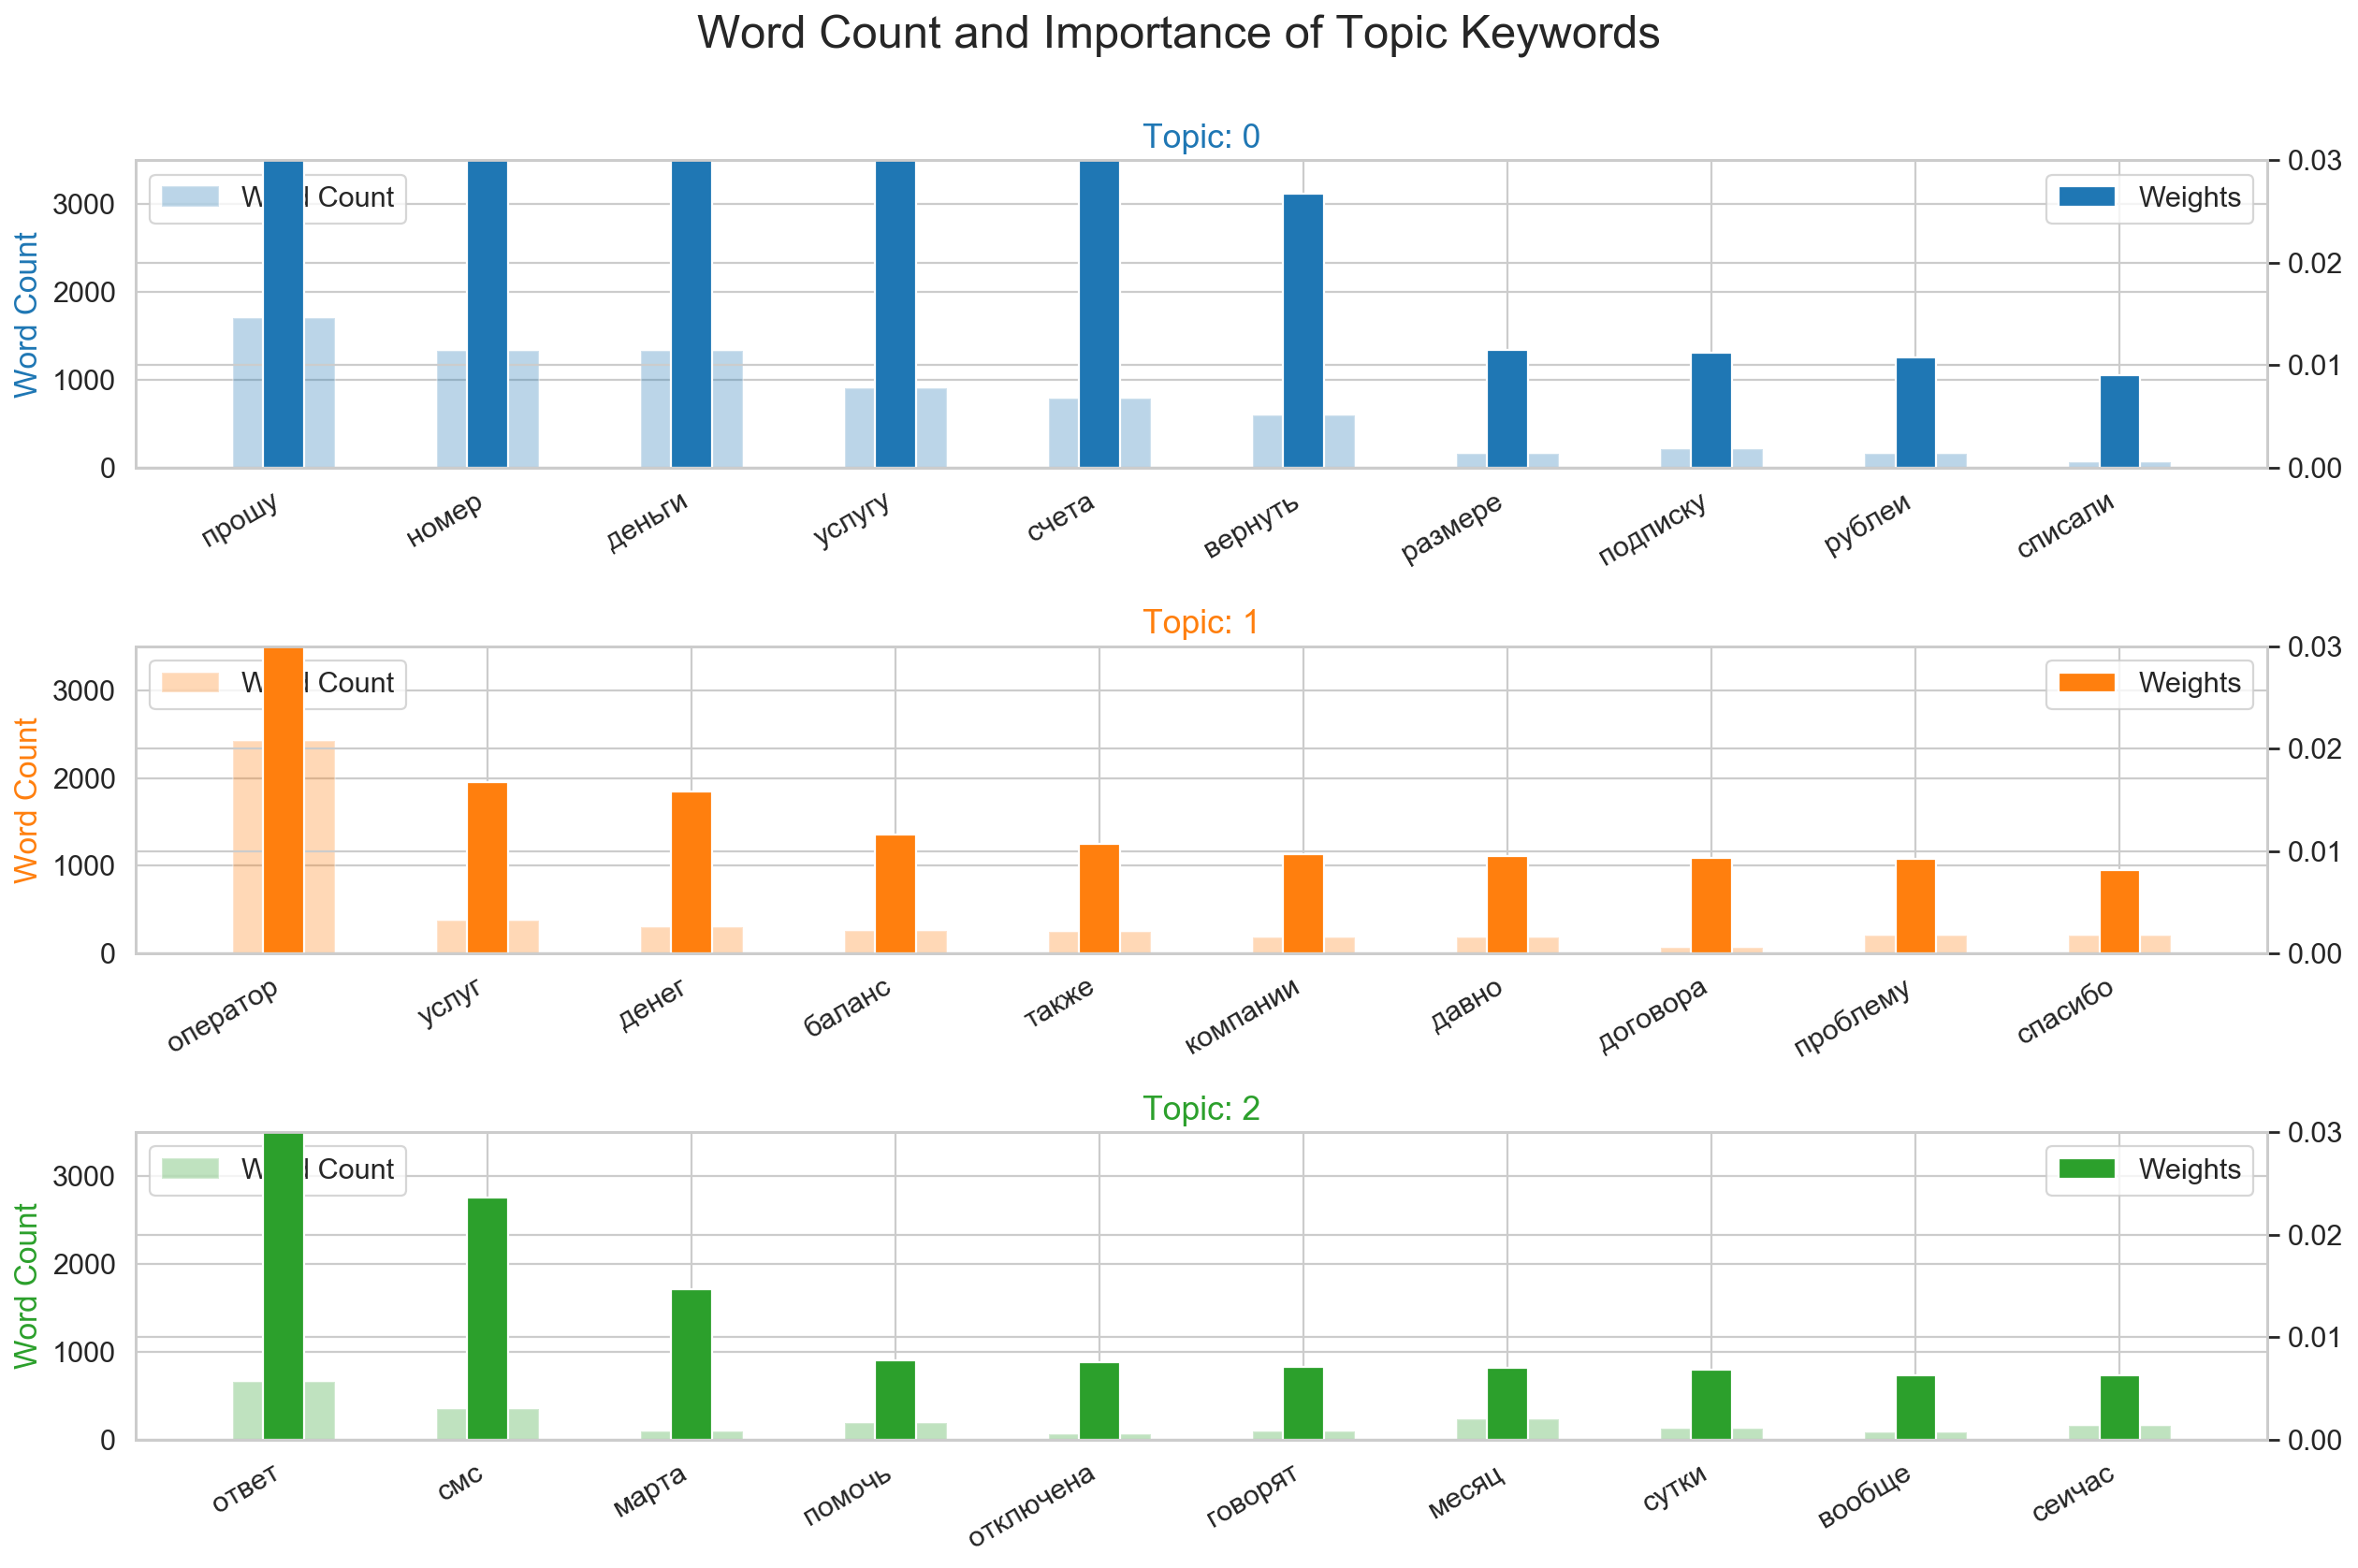

In [202]:
from collections import Counter
topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in data_ready for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(3, 1, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()

In [203]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, 
                                           id2word=id2word, 
                                           num_topics=3,
                                           random_state=123,
                                           chunksize=100, # number of docs in each training set
                                           passes=5, 
                                           alpha=0.01, # hyperparameter: represents document topic density
                                           eta='auto', # hyperparameter: word density
                                           iterations=400,
                                           per_word_topics=True)

In [204]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

/Users/alina/opt/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.249216  0.015190       1        1  38.574131
1      0.107479 -0.173357       2        1  31.366142
2      0.141736  0.158167       3        1  30.059729, topic_info=    Category         Freq      Term        Total  loglift  logprob
267  Default  1485.000000     прошу  1485.000000  30.0000  30.0000
28   Default  1069.000000    деньги  1069.000000  29.0000  29.0000
35   Default   726.000000    услугу   726.000000  28.0000  28.0000
34   Default   676.000000     счета   676.000000  27.0000  27.0000
85   Default   475.000000   вернуть   475.000000  26.0000  26.0000
..       ...          ...       ...          ...      ...      ...
154   Topic3    60.521381   которыи    76.384422   0.9692  -5.4799
170   Topic3    71.753365  проблему   162.114517   0.3869  -5.3097
55    Topic3    67.752792    помочь   159.840546   0.3437  -5.3671
75    Topic3    61.201588    сеичас   130.802597   0.4425  -5.4688
31    Topic3    97.113579     номер  1064.985352  -1.1929  -5.0070

[165 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
900       2  0.991917     http
1662      1  0.997581      sms
77        1  0.998273   баланс
318       2  0.994302     вами
85        1  0.999891  вернуть
...     ...       ...      ...
35        1  0.998777   услугу
36        3  0.976839  хочется
197       1  0.040085    часов
197       2  0.942006    часов
933       2  0.995568     этих

[162 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3])

### Анализ таблицы 2 <a class="anchor" id="ch4"></a>

Далее мы проделаем не полоценный анализ как с таблицей 1, а только выведем несколько диаграмм, которые нам особенно помогут с выбором корректной темы. 

In [205]:
data2 = df2.Text.values.tolist()
data_words2 = list(sent_to_words(data2))
print(data_words2[:1])

[['оператор', 'снова', 'обманывает', 'оператор', 'появилась', 'новая', 'развод', 'услуга', 'мегофон', 'тв', 'которая', 'при', 'подключении', 'спустя', 'днеи', 'начинает', 'брать', 'абонентскую', 'плату', 'рублеи', 'день', 'причем', 'неважно', 'пользуетесь', 'вы', 'ею', 'или', 'нет', 'неважно', 'есть', 'ли', 'она', 'бесплатно', 'вашем', 'пакете', 'услуг', 'личном', 'кабинете', 'эта', 'платная', 'услуга', 'нигде', 'не', 'отображается', 'девушка', 'оператор', 'вам', 'скажет', 'что', 'вас', 'нет', 'платных', 'услуг', 'эту', 'абонент', 'плату', 'можно', 'отключить', 'только', 'специальнои', 'техническои', 'поддержке', 'оператор', 'тв', 'причем', 'эта', 'поддержка', 'очень', 'занята', 'вас', 'могут', 'по', 'кругу', 'вести', 'нескольк', 'часов', 'будьте', 'бдительны', 'не', 'попадаитесь', 'очередную', 'ловушку', 'оператора', 'сотовои', 'связи', 'буду', 'искать', 'другую', 'компанию', 'думаю', 'другого', 'оператора', 'интернет', 'быстрее']]


In [206]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import LatentDirichletAllocation
tfidf_vectorizer2 = TfidfVectorizer(stop_words=russian_stopwords, ngram_range=(2,3))
lda2 = LatentDirichletAllocation(n_components=3)
pipe = make_pipeline(tfidf_vectorizer2, lda2)
pipe.fit(df2['Text'])
print_top_words(lda2, tfidf_vectorizer2.get_feature_names(), n_top_words=9)

/Users/alina/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['оператор1'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


Topic #0: сим карту, личный кабинет, другого оператора, другому оператору, добрый день, службу поддержки, личном кабинете, оператор2 ru, компании оператор2
Topic #1: другого оператора, личном кабинете, сим карту, другому оператору, личный кабинет, сих пор, компании оператор2, сим карты, каждый день
Topic #2: личном кабинете, личный кабинет, другому оператору, сим карту, добрый день, тарифный план, другого оператора, каждый день, абонентская плата



In [207]:
# Build the bigram and trigram models
bigram2 = gensim.models.Phrases(data_words2, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram2 = gensim.models.Phrases(bigram2[data_words2], threshold=100)  
bigram_mod2 = gensim.models.phrases.Phraser(bigram2)
trigram_mod2 = gensim.models.phrases.Phraser(trigram2)
data_ready2 = process_words(data_words2)

In [208]:
id2word2 = corpora.Dictionary(data_ready2)

# Create Corpus: Term Document Frequency
corpus2 = [id2word2.doc2bow(text) for text in data_ready2]

# Build LDA model
lda_model2 = gensim.models.ldamodel.LdaModel(corpus=corpus2,
                                           id2word=id2word2,
                                           num_topics=3, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=10,
                                           passes=10,
                                           alpha='symmetric',
                                           iterations=100,
                                           per_word_topics=True)

pprint(lda_model2.print_topics())

[(0,
  '0.046*"ответ" + 0.023*"деньги" + 0.014*"смс" + 0.012*"трафика" + '
  '0.010*"ошибка" + 0.010*"счета" + 0.010*"звоню" + 0.009*"услугу" + '
  '0.008*"которое" + 0.008*"говорят"'),
 (1,
  '0.024*"прошу" + 0.018*"также" + 0.017*"связи" + 0.015*"обращение" + '
  '0.014*"заявка" + 0.012*"ответили" + 0.012*"услуг" + 0.011*"предложили" + '
  '0.011*"часа" + 0.011*"заявления"'),
 (2,
  '0.155*"оператор" + 0.064*"номер" + 0.021*"баланс" + 0.016*"марта" + '
  '0.014*"компании" + 0.013*"месяц" + 0.013*"денег" + 0.010*"минус" + '
  '0.009*"день" + 0.008*"gt_lt_span_gt"')]


In [209]:
df_topic_sents_keywords2 = format_topics_sentences(ldamodel=lda_model2, corpus=corpus2, texts=data_words2)

# Format
df_dominant_topic2 = df_topic_sents_keywords2.reset_index()
df_dominant_topic2.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic2.head(20)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,1.0,0.5078,"прошу, также, связи, обращение, заявка, ответили, услуг, предложили, часа, заявления","[оператор, снова, обманывает, оператор, появилась, новая, развод, услуга, мегофон, тв, которая, при, подключении, спустя, днеи, начинает, брать, абонентскую, плату, рублеи, день, причем, неважно, пользуетесь, вы, ею, или, нет, неважно, есть, ли, она, бесплатно, вашем, пакете, услуг, личном, кабинете, эта, платная, услуга, нигде, не, отображается, девушка, оператор, вам, скажет, что, вас, нет, платных, услуг, эту, абонент, плату, можно, отключить, только, специальнои, техническои, поддержке, оператор, тв, причем, эта, поддержка, очень, занята, вас, могут, по, кругу, вести, нескольк, часов, будьте, бдительны, не, попадаитесь, очередную, ловушку, оператора, сотовои, связи, буду, искать, другую, компанию, думаю, другого, оператора, интернет, быстрее]"
1,1,1.0,0.5784,"прошу, также, связи, обращение, заявка, ответили, услуг, предложили, часа, заявления","[являясь, руководителем, корпорации, оператор, всегда, считал, что, право, устанавливать, тарифные, планы, сотрудникам, суммы, которые, они, могут, потратить, из, моего, бюджета, на, связь, есть, только, меня, доверенных, мною, лиц, соответственно, обязанность, по, оплате, этих, услуг, тоже, возлагается, на, мое, юр, лицо, но, вот, компания, мегофон, решила, по, другому, сотрудница, телемаркетинга, позвонила, сотруднице, моеи, корпорации, они, мило, так, побеседовали, каждая, сделала, свои, выводы, сотрудница, телемаркетинга, оператор, решила, что, можно, поменять, тариф, руб, месяц, на, тариф, которыи, мне, обошелся, за, ноябрь, сотрудница, моеи, корпорации, утверждает, что, не, давала, согласия, на, смену, тарифного, плана, ничего, тарифах, не, понимает, не, оплачивает, услуги, корпоративнои, связи, личными, ...]"
2,2,1.0,0.7216,"прошу, также, связи, обращение, заявка, ответили, услуг, предложили, часа, заявления","[являясь, пользователем, услуг, данного, оператора, связи, течение, многих, лет, более, учетом, того, что, связи, географиеи, поездок, некоторых, других, нюансов, является, по, сути, для, меня, основные, проблемы, которыми, приходится, сталкиваться, это, некомпетентная, техническая, поддержка, постоянное, обновление, баз, данных, номеров, технические, работы, на, номерах, которые, ведутся, годами, вообще, не, представляю, как, такое, может, быть, сохранением, одних, тех, же, проблем, приводящие, ограничению, пользованием, отдельными, услугами, очереднои, раз, перестал, работать, прямои, городскои, номер, при, изменении, тарифа, при, положительном, балансе, приняли, обращение, службу, техническои, поддержки, по, телефону, сказали, что, проблему, решат, течение, суток, при, очередном, звонке, по, номеру, сказали, что, решат, проблему, течение, нескольких, днеи, ...]"
3,3,2.0,0.7792,"оператор, номер, баланс, марта, компании, месяц, денег, минус, день, gt_lt_span_gt","[являясь, клиентом, оператор, его, основания, nw, gsm, была, шокирована, отношением, компании, оператор, своим, клиентам, меня, тариф, копеики, оплату, производила, постоянно, никогда, не, было, проблем, как, вдруг, оказалось, что, подключена, услуга, трава, ру, которои, даже, не, подозревала, моего, счета, списывались, каждыи, день, по, даннои, услугои, были, списаны, меня, данныи, момент, имеется, задолженность, по, этои, услуги, господа, оператор, цы, вас, не, просила, ее, подключать, самостоятельно, не, подключалась, даже, не, знаю, как, пользоватьсяи, не, пользовалась, верните, деньги, за, что, вы, так, не, хотелось, бы, расстаться, оператор, ом, не, пользуюсь, сим, картои, услугами, оператор, августа]"
4,4,2.0,0.4905,"оператор, номер, баланс, марта, компании, месяц, денег, минус, день, gt_lt_span_gt","[являюсь, нет, являлся, надеюсь, абонентом, оператор, прямым, номером, января, года, тариф, свобода, слова, сити, предоплаченными, минутами, исходящих, вызовов, на, любых, операторов, региона, это, важно, но, тут, произошли, события, которые, спо

In [210]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model2, corpus2, id2word2)
vis

/Users/alina/opt/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.146911  0.158323       1        1  36.356525
2     -0.218568  0.041052       2        1  35.864216
1      0.071657 -0.199375       3        1  27.779261, topic_info=     Category         Freq           Term        Total  loglift  logprob
29    Default  1503.000000       оператор  1503.000000  30.0000  30.0000
110   Default   623.000000          номер   623.000000  29.0000  29.0000
6     Default   450.000000          ответ   450.000000  28.0000  28.0000
132   Default   181.000000          прошу   181.000000  27.0000  27.0000
126   Default   230.000000         деньги   230.000000  26.0000  26.0000
...       ...          ...            ...          ...      ...      ...
2148   Topic3    41.539360    сегодняшнии    42.752819   1.2521  -5.1990
304    Topic3    31.660135    пользовался    32.486996   1.2551  -5.4706
476    Topic3    39.336205         салоне    40.900845   1.2419  -5.2535
3824   Topic3    33.725277         замену    36.497128   1.2019  -5.4074
2170   Topic3    52.179081  gt_lt_span_gt   164.719543   0.1313  -4.9710

[141 rows x 6 columns], token_table=      Topic      Freq           Term
term                                
2170      1  0.188199  gt_lt_span_gt
2170      2  0.491745  gt_lt_span_gt
2170      3  0.315688  gt_lt_span_gt
454       1  0.987917       абонента
2504      1  0.057361        активен
2504      2  0.889103        активен
2504      3  0.057361        активен
58        2  0.994821         баланс
146       1  0.942503          банка
146       2  0.037700          банка
146       3  0.025133          банка
164       1  0.992381       безлимит
277       3  0.978638           вами
216       1  0.982813        вернули
120       3  0.992875        вернуть
1166      3  0.977433    возможности
1016      1  0.990204        говорят
844       3  0.985543           года
121       3  0.987816          давно
16        2  0.995001          денег
41        2  0.991231           день
126       1  0.997665         деньги
1037      1  0.954895       договора
1037      2  0.022207       договора
1037      3  0.022207       договора
185       1  0.867537           долг
185       2  0.123934           долг
1366      2  0.980612         должен
201       1  0.991609         других
892       2  0.970678    естественно
389       2  0.981340   заблокирован
3824      2  0.054799         замену
3824      3  0.931580         замену
754       3  0.991868         заявка
471       3  0.997341      заявления
532       1  0.997192          звоню
70        2  0.975287          знают
266       3  0.976759      интернета
329       2  0.962968     интернетом
421       2  0.971762         каждыи
360       2  0.995156        клиенту
73        2  0.993728       компании
565       2  0.979188       компания
1423      2  0.989204          копии
380       1  0.025471         короче
380       2  0.967896         короче
536       1  0.981649        которое
536       2  0.012426        которое
17        1  0.983241        которые
251       1  0.992223        которыи
135       2  0.979818           люди
274       2  0.998849          марта
170       2  0.995200          месяц
297       2  0.995810          минус
1281      3  0.988602          могут
492       1  0.979083           моих
492       2  0.024477           моих
151       1  0.997865          назад
595       1  0.980718           нему
152       1  0.988536     необходимо
1806      1  0.028134        никаких
1806      2  0.928424        никаких
1806      3  0.056268        никаких
955       3  0.971011         никому
110       2  0.999213          номер
1161      1  0.983846          нужно
498       1  0.018554      обратился
498       2  0.927719      обратился
498       3  0.055663      обратился
300       3  0.994976      обращение
78        2  0.980500         однако
347       2  0.991891        октября
29        2  0.999885       оператор

### Анализ таблицы 3 <a class="anchor" id="ch5"></a>

In [211]:
df3.Text = df3.Text.astype(str)
data3 = df3.Text.values.tolist()
data_words3 = list(sent_to_words(data3))

In [212]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import LatentDirichletAllocation
tfidf_vectorizer = TfidfVectorizer(stop_words=russian_stopwords, ngram_range=(2,3))
lda = LatentDirichletAllocation(n_components=2)
pipe = make_pipeline(tfidf_vectorizer, lda)
pipe.fit(df3['Text'])
print_top_words(lda, tfidf_vectorizer.get_feature_names(), n_top_words=7)

/Users/alina/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['оператор1'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


Topic #0: добрый день, сим карту, вернуть деньги, сим карты, личном кабинете, сим карта, личный кабинет
Topic #1: сим карту, прошу разобраться, вернуть деньги, личном кабинете, личный кабинет, сим карты, супер оператор3



In [213]:
# Build the bigram and trigram models
bigram3 = gensim.models.Phrases(data_words3, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram3 = gensim.models.Phrases(bigram3[data_words3], threshold=100)  
bigram_mod3 = gensim.models.phrases.Phraser(bigram3)
trigram_mod3 = gensim.models.phrases.Phraser(trigram3)
data_ready3 = process_words(data_words3)

In [214]:
id2word3 = corpora.Dictionary(data_ready3)

# Create Corpus: Term Document Frequency
corpus3 = [id2word3.doc2bow(text) for text in data_ready3]

# Build LDA model
lda_model3 = gensim.models.ldamodel.LdaModel(corpus=corpus3,
                                           id2word=id2word3,
                                           num_topics=2, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=10,
                                           passes=10,
                                           alpha='symmetric',
                                           iterations=100,
                                           per_word_topics=True)

pprint(lda_model3.print_topics())

[(0,
  '0.046*"номер" + 0.029*"ответ" + 0.028*"прошу" + 0.016*"деньги" + '
  '0.008*"ответили" + 0.007*"smart" + 0.007*"денег" + 0.007*"заявления" + '
  '0.007*"магазин" + 0.006*"предложили"'),
 (1,
  '0.104*"оператор" + 0.011*"услугу" + 0.009*"смс" + 0.009*"баланс" + '
  '0.009*"компании" + 0.008*"также" + 0.008*"услуг" + 0.007*"размере" + '
  '0.006*"необходимо" + 0.005*"своих"')]


In [215]:
df_topic_sents_keywords3 = format_topics_sentences(ldamodel=lda_model3, corpus=corpus3, texts=data_words3)

# Format
df_dominant_topic3 = df_topic_sents_keywords3.reset_index()
df_dominant_topic3.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic3.head(20)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,1.0,0.9532,"оператор, услугу, смс, баланс, компании, также, услуг, размере, необходимо, своих","[яне, вижу, особои, разницы, между, троикои, россииских, мобильных, операторов, оператор, оператор, оператор, плане, стоимости, разница, тарифах, до, рублеи, для, меня, значения, не, имеет, вот, что, имеет, так, это, уверенность, том, что, любое, время, дня, ночи, любом, месте, буду, оставаться, на, связи, этом, плане, выигрывает, несомненно, оператор, он, отлично, ловит, там, где, другие, операторы, сдуваются, на, даче, только, оператор, на, работе, то, же, кого, другои, оператор, например, постоянно, проблемами, сталкиваются, интернет, них, неплохои, недорогои, относительно, надежныи, да, срывы, иногда, случаются, но, во, первых, их, специалисты, быстро, реагируют, во, вторых, консультанты, по, телефону, не, обманывают, не, перекидывают, на, других, стараются, решить, проблему, ...]"
1,1,0.0,0.5338,"номер, ответ, прошу, деньги, ответили, smart, денег, заявления, магазин, предложили","[явно, поимал, компанию, оператор, на, списании, лишних, денег, вчера, личном, кабинете, убрал, все, лишние, услуги, сделал, скрины, страниц, получил, распечатку, расходов, вечером, проверил, баланс, решил, каждыи, день, проверять, утром, запросил, баланс, сняли, наверное, как, они, любят, типа, за, услугу, вам, звонили, думаю, наверное, опять, подключили, втихаря, захожу, лк, все, то, же, никаких, платных, услуг, не, подключено, звонков, не, было, да, по, тарифу, минута, звонка, смс, ка, попытался, дозвониться, до, колл, центра, вероятно, них, так, настроено, кого, пропали, деньги, дозвониться, сразу, не, получится, минут, слушал, музыку, автофразу, время, ожидания, специалиста, составляет, более, минут, когда, подошло, время, просто, отключились, но, вам, скажут, ...]"
2,2,0.0,0.5259,"номер, ответ, прошу, деньги, ответили, smart, денег, заявления, магазин, предложили","[являясь, корпоративным, клиентом, пао, оператор, обнаружил, сегодня, утром, что, на, телефоне, закончились, деньги, не, долго, думая, достал, карточку, набрав, номер, попытался, пополнить, баланс, как, это, делал, последние, лет, но, не, тут, то, было, проделав, довольно, длинную, операцию, ни, один, раз, по, вводу, параметров, карточки, мне, ответили, что, превышен, лимит, платежеи, во, как, последнии, раз, платил, месяц, назад, звоню, спрашиваю, почему, на, что, мне, говорят, то, что, прошлом, месяце, когда, обращался, тои, же, проблемои, хреновыи, банк, хреново, нажимаете, кнопки, хреновая, карточка, нас, по, первому, закону, связиста, проблем, нет, это, все, банк, виноват, хом, кредит, хом, кредит, пенои, рта, говорит, что, нас, ...]"
3,3,0.0,0.8889,"номер, ответ, прошу, деньги, ответили, smart, денег, заявления, магазин, предложили","[являюсь, постоянным, пользователем, этои, компании, замечал, них, различные, подставы, увертки, виде, скрытых, платных, услуг, или, внезапно, ставших, платными, подписок, но, свежии, случаи, вынудили, переити, на, другои, тариф, связи, закрытием, старого, перешел, через, мобильное, приложение, на, супер, оператор, сразу, взяли, рублеи, за, ненужную, мне, опцию, мобильном, приложении, нет, отключения, платных, опции, через, браузер, отключил, все, супер, на, следующии, день, опять, сняли, руб, типа, за, включенную, опцию, звонки, оплачиваются, как, будь, то, она, отключена, ни, какои, связи, чтоб, написать, письмо, предоставить, информацию, нет, одни, роботы, кругом, магазинах, мерчендаизеры]"
4,4,1.0,0.8776,"оператор, услугу, смс, баланс, компании, также, услуг, размере, необходимо, своих","[являюсь, пользователем, телефонного, номера, года, интервале, между, мин, сек, мин, сек, течение, сек, моего, счета, были, списаны, средства, размере, рублеи, без, учета, ндс, ндс, сумма, получается, еще, крупнее, средства, списаны, путем, отправки, без, моего, ведома, смс, сообщении, на, короткие, номера, ни, одно, сообщение, моего, телефона, данныи, период, времени, отправлено, не, было, оплата,

In [216]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model3, corpus3, id2word3)
vis

/Users/alina/opt/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x    y  topics  cluster       Freq
topic                                           
0      0.143071  0.0       1        1  51.393784
1     -0.143071  0.0       2        1  48.606213, topic_info=     Category         Freq            Term        Total  loglift  logprob
6     Default  1009.000000        оператор  1009.000000  30.0000  30.0000
20    Default   469.000000           номер   469.000000  29.0000  29.0000
69    Default   294.000000           ответ   294.000000  28.0000  28.0000
104   Default   284.000000           прошу   284.000000  27.0000  27.0000
203   Default   168.000000          деньги   168.000000  26.0000  26.0000
188   Default   107.000000          услугу   107.000000  25.0000  25.0000
173   Default    91.000000             смс    91.000000  24.0000  24.0000
59    Default    84.000000          баланс    84.000000  23.0000  23.0000
121   Default    80.000000           также    80.000000  22.0000  22.0000
54    Default    77.000000           услуг    77.000000  21.0000  21.0000
39    Default    80.000000        ответили    80.000000  20.0000  20.0000
209   Default    76.000000           smart    76.000000  19.0000  19.0000
574   Default    66.000000         размере    66.000000  18.0000  18.0000
333   Default    69.000000           денег    69.000000  17.0000  17.0000
354   Default    67.000000         магазин    67.000000  16.0000  16.0000
95    Default    64.000000      предложили    64.000000  15.0000  15.0000
301   Default    62.000000         вернуть    62.000000  14.0000  14.0000
36    Default    59.000000           месяц    59.000000  13.0000  13.0000
878   Default    69.000000       заявления    69.000000  12.0000  12.0000
206   Default    60.000000           счета    60.000000  11.0000  11.0000
349   Default    53.000000           своих    53.000000  10.0000  10.0000
146   Default    50.000000       оператору    50.000000   9.0000   9.0000
256   Default    52.000000      сотрудника    52.000000   8.0000   8.0000
1085  Default    49.000000        договора    49.000000   7.0000   7.0000
262   Default    46.000000        абонента    46.000000   6.0000   6.0000
384   Default    44.000000          помочь    44.000000   5.0000   5.0000
734   Default    44.000000          товара    44.000000   4.0000   4.0000
516   Default    41.000000           связь    41.000000   3.0000   3.0000
448   Default    42.000000           смена    42.000000   2.0000   2.0000
52    Default    48.000000        средства    48.000000   1.0000   1.0000
20     Topic1   468.773682           номер   469.353943   0.6644  -3.0871
69     Topic1   294.352081           ответ   294.923706   0.6637  -3.5525
104    Topic1   283.735931           прошу   284.427277   0.6632  -3.5892
203    Topic1   168.214462          деньги   168.805084   0.6621  -4.1120
301    Topic1    62.438858         вернуть    62.876118   0.6587  -5.1030
95     Topic1    64.175850      предложили    64.698883   0.6575  -5.0756
36     Topic1    59.373653           месяц    59.911839   0.6566  -5.1534
39     Topic1    79.387306        ответили    80.157516   0.6560  -4.8629
384    Topic1    43.871750          помочь    44.321590   0.6555  -5.4560
1085   Topic1    49.287098        договора    49.840019   0.6545  -5.3396
333    Topic1    69.074638           денег    69.875031   0.6541  -5.0020
448    Topic1    41.954510           смена    42.502136   0.6527  -5.5006
209    Topic1    75.173149           smart    76.159637   0.6526  -4.9174
354    Topic1    67.055016         магазин    67.943192   0.6525  -5.0317
256    Topic1    52.284267      сотрудника    52.992176   0.6522  -5.2805
37     Topic1    38.733185           назад    39.266750   0.6520  -5.5805
190    Topic1    38.338345         вернули    38.868908   0.6519  -5.5908
410    Topic1    40.836605           рубля    41.445045   0.6509  -5.5277
33     Topic1    41.764065           звоню    42.391514   0.6507  -5.5052
353    Topic1    32.123825         которыи    32.646999   0.6

### Анализ таблицы 4 <a class="anchor" id="ch6"></a>

In [217]:
data4 = df4.Text.values.tolist()
data_words4 = list(sent_to_words(data4))
print(data_words4[:1])

[['явное', 'ограничение', 'скорости', 'на', 'тарифе', 'интернет', 'pro', 'первыи', 'подарочныи', 'месяц', 'скорость', 'была', 'норм', 'около', 'мб', 'спосле', 'оплаты', 'го', 'через', 'пару', 'днеи', 'пришло', 'смс', 'все', 'кб', 'ся', 'вас', 'прошу', 'помогите', 'пожалуиста']]


In [218]:
tfidf_vectorizer = TfidfVectorizer(stop_words=russian_stopwords, ngram_range=(2,3))
lda = LatentDirichletAllocation(n_components=2)
pipe = make_pipeline(tfidf_vectorizer, lda)
pipe.fit(df4['Text'])
print_top_words(lda, tfidf_vectorizer.get_feature_names(), n_top_words=7)

/Users/alina/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['оператор1'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


Topic #0: вернуть деньги, каждый день, личном кабинете, добрый день, 90 дней, ограничение скорости, оплаты 90
Topic #1: отключить услугу, ограничение скорости, личном кабинете, скорости 64, 64 кбит, ограничение скорости 64, 64 кб



In [219]:
# Build the bigram and trigram models
bigram4 = gensim.models.Phrases(data_words4, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram4 = gensim.models.Phrases(bigram4[data_words4], threshold=100)  
bigram_mod4 = gensim.models.phrases.Phraser(bigram4)
trigram_mod4 = gensim.models.phrases.Phraser(trigram4)
data_ready4 = process_words(data_words4)

In [220]:
id2word4 = corpora.Dictionary(data_ready4)

# Create Corpus: Term Document Frequency
corpus4 = [id2word4.doc2bow(text) for text in data_ready4]

# Build LDA model
lda_model4 = gensim.models.ldamodel.LdaModel(corpus=corpus4,
                                           id2word=id2word4,
                                           num_topics=2, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=10,
                                           passes=10,
                                           alpha='symmetric',
                                           iterations=100,
                                           per_word_topics=True)

pprint(lda_model4.print_topics())

[(0,
  '0.048*"номер" + 0.032*"деньги" + 0.024*"счета" + 0.023*"ответ" + '
  '0.018*"денег" + 0.013*"смс" + 0.012*"баланс" + 0.012*"марта" + '
  '0.010*"снимают" + 0.009*"месяц"'),
 (1,
  '0.076*"оператор" + 0.051*"прошу" + 0.030*"услугу" + 0.016*"вернуть" + '
  '0.014*"ежедневно" + 0.010*"услуг" + 0.009*"проблему" + 0.009*"размере" + '
  '0.008*"помочь" + 0.007*"рублеи"')]


In [221]:
df_topic_sents_keywords4 = format_topics_sentences(ldamodel=lda_model4, corpus=corpus4, texts=data_words4)

# Format
df_dominant_topic4 = df_topic_sents_keywords4.reset_index()
df_dominant_topic4.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic4.head(20)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,1.0,0.5004,"оператор, прошу, услугу, вернуть, ежедневно, услуг, проблему, размере, помочь, рублеи","[явное, ограничение, скорости, на, тарифе, интернет, pro, первыи, подарочныи, месяц, скорость, была, норм, около, мб, спосле, оплаты, го, через, пару, днеи, пришло, смс, все, кб, ся, вас, прошу, помогите, пожалуиста]"
1,1,1.0,0.5048,"оператор, прошу, услугу, вернуть, ежедневно, услуг, проблему, размере, помочь, рублеи","[являюсь, потребителем, услуг, оператор, лет, нарекании, нет, но, возникла, последнюю, неделю, или, две, такая, проблема, со, счета, ежедневно, списывается, по, руб, на, номер, сделала, детализацию, звонков, помогите, пожалуиста, пресечь, все, это, незаконное, дело, доп, услуг, точно, никаких, не, подключала, по, запрошеннои, детализации, списано, как, минимум, руб]"
2,2,0.0,0.7472,"номер, деньги, счета, ответ, денег, смс, баланс, марта, снимают, месяц","[являюсь, пользователем, тарифа, интернет, навсегда, за, два, последних, дня, был, списан, весь, объем, трафика, это, при, том, что, доступ, сети, интернет, лимитирован, предоставлен, лишь, для, трех, приложении, для, этих, же, трех, приложении, ежедневныи, лимит, не, более, мб, совокупно, он, не, был, превышен, возможно, самое, главное, последние, дня, телефон, находился, зоне, фактическая, скорость, итого, начала, месяца, потрачено, не, более, мб, допускаю, небольшие, расхождения, со, статистикои, смартфона, но, не, до, округления, до, мб, еще, два, месяца, назад, приходили, смс, якобы, подключеннои, услуге, доверительныи, платеж, задолженности, по, нему, после, обращения, тп, признавали, смс, ошибочными, потом, это, опять, повторялось, опять, каялись, все, это, тому, ...]"
3,3,0.0,0.8642,"номер, деньги, счета, ответ, денег, смс, баланс, марта, снимают, месяц","[являюсь, обонентом, лет, лопнуло, терпение, приобрел, номер, для, родителеи, подарок, легким, набором, отключили, не, соизволив, прислать, смс, итоге, друзья, ветераны, не, могут, пообщаться, номера, больше, нет, мамы, давление, за, вы, что, творите, на, мое, обращение, помощи, дерзко, ответила, девочка, грубои, форме, мол, договор, надо, читать, на, мое, имя, несколько, телефоннных, номеров, неужели, на, какои, нибудь, из, них, нельзя, было, прислать, уведомление, совесть, продаете, красивыми, номерами, вы, обидели, самых, дорогих, мне, людеи]"
4,4,0.0,0.5543,"номер, деньги, счета, ответ, денег, смс, баланс, марта, снимают, месяц","[являюсь, корпоративным, клиентом, оператор, активно, использую, все, услуги, связи, мобильныи, интернет, звонки, передачеи, данных, sms, mms, но, никогда, не, пользовался, не, собираюсь, wap, по, номеру, обнаружил, платную, подписку, на, какие, то, услуги, короткого, номера, подписки, по, руб, сутки, оператор, оператор, отправил, куб, после, связи, этои, конторои, получил, такои, ответ, здравствуите, подписка, отключена, абонент, заходит, на, wap, саит, mob, ka, net, выбирает, контент, переходит, на, landing, pahe, оператора, оператор, где, явном, виде, демонстрируются, условия, подписки, далее, нажимает, кнопу, ок, оформляет, подписку, после, подписки, поступает, информационное, сообщение, номера, услуга, предоставлена, корректно, основании, для, возврата, денежных, средств, нет, никакие, услуги, за, это, время, ...]"
5,5,1.0,0.9479,"оператор, прошу, услугу, вернуть, ежедневно, услуг, проблему, размере, помочь, рублеи","[являюсь, корпоративным, пользователем, пользуюсь, несколькими, телефонами, на, одном, из, номеров, при, пользовании, мобильным, интернетом, произошло, списание, денег, на, ниже, перечисленные, номера, premium, rate, mo, sms, руб, premium, rate, mo, sms, руб, производились, попытки, снять, деньги, нескольких, коротких, номеров, premium, rate, mo, sms, руб, premium, rate, mo, sms, руб, никаких, услуг, интернете, ни, на, саите, контент, проваидера, ни, на, каком, другом, интернет, ресурсе, не, подключал, sms, сообщении, на, короткие, номера, не, отправлял, заявки, на, платную, подписку, предоста

In [222]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model4, corpus4, id2word4)
vis

/Users/alina/opt/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x    y  topics  cluster       Freq
topic                                           
0      0.170674  0.0       1        1  50.548172
1     -0.170674  0.0       2        1  49.451832, topic_info=     Category        Freq            Term       Total  loglift  logprob
23    Default  832.000000        оператор  832.000000  30.0000  30.0000
0     Default  558.000000           прошу  558.000000  29.0000  29.0000
14    Default  536.000000           номер  536.000000  28.0000  28.0000
121   Default  362.000000          деньги  362.000000  27.0000  27.0000
52    Default  323.000000          услугу  323.000000  26.0000  26.0000
110   Default  266.000000           счета  266.000000  25.0000  25.0000
82    Default  257.000000           ответ  257.000000  24.0000  24.0000
88    Default  197.000000           денег  197.000000  23.0000  23.0000
45    Default  173.000000         вернуть  173.000000  22.0000  22.0000
47    Default  158.000000       ежедневно  158.000000  21.0000  21.0000
1     Default  140.000000             смс  140.000000  20.0000  20.0000
248   Default  135.000000          баланс  135.000000  19.0000  19.0000
189   Default  133.000000           марта  133.000000  18.0000  18.0000
44    Default  106.000000           услуг  106.000000  17.0000  17.0000
334   Default  109.000000         снимают  109.000000  16.0000  16.0000
59    Default  100.000000        проблему  100.000000  15.0000  15.0000
116   Default   99.000000           месяц   99.000000  14.0000  14.0000
681   Default   96.000000         вернули   96.000000  13.0000  13.0000
316   Default   96.000000         размере   96.000000  12.0000  12.0000
85    Default   97.000000       списывают   97.000000  11.0000  11.0000
307   Default   85.000000          помочь   85.000000  10.0000  10.0000
6     Default   86.000000           назад   86.000000   9.0000   9.0000
26    Default   83.000000        подписку   83.000000   8.0000   8.0000
62    Default   80.000000        ответили   80.000000   7.0000   7.0000
156   Default   75.000000          рублеи   75.000000   6.0000   6.0000
381   Default   75.000000      интернетом   75.000000   5.0000   5.0000
41    Default   73.000000        списание   73.000000   4.0000   4.0000
67    Default   74.000000        компании   74.000000   3.0000   3.0000
229   Default   78.000000      подключена   78.000000   2.0000   2.0000
354   Default   68.000000        безлимит   68.000000   1.0000   1.0000
14     Topic1  536.183350           номер  536.915649   0.6809  -3.0336
121    Topic1  361.495697          деньги  362.028473   0.6808  -3.4278
82     Topic1  257.080688           ответ  257.735687   0.6797  -3.7687
1      Topic1  140.325027             смс  140.823303   0.6787  -4.3741
248    Topic1  134.637619          баланс  135.153381   0.6784  -4.4155
334    Topic1  109.052155         снимают  109.515625   0.6780  -4.6262
110    Topic1  265.293488           счета  266.515900   0.6776  -3.7372
116    Topic1   99.494171           месяц   99.956879   0.6776  -4.7180
88     Topic1  196.642929           денег  197.675659   0.6770  -4.0367
6      Topic1   86.382698           назад   86.859474   0.6767  -4.8593
189    Topic1  132.214264           марта  133.101776   0.6756  -4.4336
354    Topic1   67.798370        безлимит   68.276199   0.6752  -5.1015
11     Topic1   63.863605         трафика   64.316948   0.6752  -5.1613
26     Topic1   82.590927        подписку   83.181091   0.6751  -4.9042
244    Topic1   61.698818           равно   62.168015   0.6747  -5.1958
681    Topic1   96.149727         вернули   96.897484   0.6745  -4.7521
134    Topic1   51.192669          каждыи   51.622742   0.6739  -5.3825
85     Topic1   96.918716       списывают   97.837212   0.6728  -4.7442
1179   Topic1   58.501091         положил   59.089149   0.6722  -5.2490
62     Topic1   80.012390        ответили   80.821663   0.6722  -4.9359
330    Topic1   47.389305       интернета   47.879269   0.6720  -5.4597
1406   Topic1   5

### Анализ таблицы 5 <a class="anchor" id="ch7"></a>

In [223]:
data5 = df5.Text.values.tolist()
data_words5 = list(sent_to_words(data5))
print(data_words5[:1])

[['якупила', 'сим', 'карту', 'ростове', 'на', 'дону', 'подключила', 'себе', 'интернет', 'все', 'включено', 'итоге', 'меня', 'он', 'медленыи', 'все', 'время', 'пропадает', 'становится', 'просто', 'которое', 'практически', 'не', 'грузит', 'почему']]


In [224]:
tfidf_vectorizer = TfidfVectorizer(stop_words=russian_stopwords, ngram_range=(2,3))
lda = LatentDirichletAllocation(n_components=3)
pipe = make_pipeline(tfidf_vectorizer, lda)
pipe.fit(df5['Text'])
print_top_words(lda, tfidf_vectorizer.get_feature_names(), n_top_words=10)

/Users/alina/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['оператор1'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


Topic #0: сим карту, мобильный интернет, интернет работает, добрый день, каждый день, службу поддержки, другого оператора, сих пор, безлимитный интернет, нету сети
Topic #1: вернуть деньги, безлимитный интернет, сим карту, каждый день, личный кабинет, lt span, мобильный интернет, добрый день, личном кабинете, другого оператора
Topic #2: добрый день, сим карту, мобильный интернет, безлимитный интернет, личном кабинете, личный кабинет, интернет работает, 10 минут, качество связи, помогите пожалуйста



In [225]:
# Build the bigram and trigram models
bigram5 = gensim.models.Phrases(data_words5, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram5 = gensim.models.Phrases(bigram5[data_words5], threshold=100)  
bigram_mod5 = gensim.models.phrases.Phraser(bigram5)
trigram_mod5 = gensim.models.phrases.Phraser(trigram5)
data_ready5 = process_words(data_words5)

In [226]:
id2word5 = corpora.Dictionary(data_ready5)

# Create Corpus: Term Document Frequency
corpus5 = [id2word5.doc2bow(text) for text in data_ready5]

# Build LDA model
lda_model5 = gensim.models.ldamodel.LdaModel(corpus=corpus5,
                                           id2word=id2word5,
                                           num_topics=3, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=10,
                                           passes=10,
                                           alpha='symmetric',
                                           iterations=100,
                                           per_word_topics=True)

pprint(lda_model5.print_topics())

[(0,
  '0.110*"оператор" + 0.033*"ответ" + 0.016*"списании" + 0.015*"gt_lt_span_gt" '
  '+ 0.015*"трафика" + 0.014*"прошу" + 0.013*"компании" + 0.011*"интернета" + '
  '0.010*"средств" + 0.010*"смс"'),
 (1,
  '0.048*"номер" + 0.024*"деньги" + 0.020*"баланс" + 0.017*"месяц" + '
  '0.013*"часов" + 0.012*"счета" + 0.011*"услугу" + 0.009*"день" + '
  '0.009*"списание" + 0.008*"сделал"'),
 (2,
  '0.022*"денег" + 0.013*"марта" + 0.011*"должен" + 0.011*"минус" + '
  '0.011*"проблему" + 0.011*"произошло" + 0.010*"интернетом" + 0.009*"снимают" '
  '+ 0.009*"средства" + 0.008*"вернули"')]


In [227]:
df_topic_sents_keywords5 = format_topics_sentences(ldamodel=lda_model5, corpus=corpus5, texts=data_words5)

# Format
df_dominant_topic5 = df_topic_sents_keywords5.reset_index()
df_dominant_topic5.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic5.head(20)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,0.0,0.3333,"оператор, ответ, списании, gt_lt_span_gt, трафика, прошу, компании, интернета, средств, смс","[якупила, сим, карту, ростове, на, дону, подключила, себе, интернет, все, включено, итоге, меня, он, медленыи, все, время, пропадает, становится, просто, которое, практически, не, грузит, почему]"
1,1,0.0,0.6420,"оператор, ответ, списании, gt_lt_span_gt, трафика, прошу, компании, интернета, средств, смс","[являясь, клиентом, компании, года, всегда, терпимо, относился, проблемам, связи, оператор, телефон, не, моя, абсолютная, необходимость, но, как, любои, уважающии, себя, человек, ценю, заработанные, мнои, деньги, ожидаю, этого, от, тех, кем, сотрудничаю, том, числе, от, компании, оператор, сожалению, второи, раз, сталкиваюсь, отношением, финансам, клиентов, именно, случаи, моя, супруга, тоже, клиент, оператор, года, после, очереднои, смены, телефона, обнаружила, что, за, дня, баланса, было, списано, около, рублеи, оказалось, что, предущую, смену, устарешего, тарифного, плана, оператор, без, уведомления, включил, опцию, мобильного, интернета, через, полгода, новом, телефоне, были, неправильные, настроики, если, перефразировать, ответ, оператор, сами, виноваты, ок, случаи, меня, симочныи, телефон, для, поездки, за, границу, ...]"
2,2,1.0,0.9121,"номер, деньги, баланс, месяц, часов, счета, услугу, день, списание, сделал","[являюсь, пользователем, несколько, лет, последнее, время, загрузка, особенно, после, часов, практически, останавливается, звоню, на, безплатныи, номер, оператор, просит, перезагрузить, комп, модем, несколько, минут, все, работает, нормально, потом, все, начинается, снова]"
3,3,1.0,0.7618,"номер, деньги, баланс, месяц, часов, счета, услугу, день, списание, сделал","[являюсь, пользователем, оператор, уже, лет, так, на, данныи, момент, подключен, тариф, смотри, при, просмотре, видео, интернете, видео, для, взрослых, при, переходе, на, мошенническии, саит, поисковика, меня, была, списана, денежная, плата, за, подключение, контенту, саита, какого, либо, согласия, подтверждения, мелкого, шрифта, которым, согласен, не, было, при, переходе, поисковика, яндекса, на, стороннии, саит, сразу, же, были, списаны, денежные, средства, при, разговора, оператором, оператор, оператор, явно, говорила, ну, мол, вы, сами, не, заметили, мелкии, шрифт, деньги, мы, вам, не, вернем, запрет, устанавливается, самостоятельно, только, сроком, на, месяца, почему, нельзя, на, все, время, по, то, му, что, мы, хотим, заработать, на, вас, бабки, со, ...]"
4,4,1.0,0.5438,"номер, деньги, баланс, месяц, часов, счета, услугу, день, списание, сделал","[являюсь, клиентом, сего, оператора, года, ранее, меня, все, более, менее, устраивало, но, недавнего, времени, мобильным, интернетом, творится, неладное, первое, обращение, было, марте, этого, года, именно, числа, до, этого, числа, мне, подключили, гб, дополнительно, на, условии, установить, их, программу, использовать, хотя, бы, один, раз, для, улучшения, качества, обслуживания, сети, моя, сеть, использовал, ее, чаще, но, после, принудительного, выключения, она, висела, рабочих, процессах, использовала, батарею, нескольких, навязчивых, смс, включите, программу, иначе, мы, отберем, вас, гб, ее, удалил, плюнув, на, эти, гб, надо, сказать, что, их, не, отключили, правда, на, начало, отчетного, периода, показывает, гб, всегда, включается, середине, месяца, точно, не, знаю, но, ...]"
5,5,2.0,0.5115,"денег, марта, должен, минус, проблему, произошло, интернетом, снимают, средства, вернули","[являюсь, клиентом, начала, годов, имею, несколько, номеров, все, устраивало, были, моменты, но, решались, быстро, на, этот, раз, оператор, решил, поступить, не, честно, подключился, на, тариф, включаися, пиши, за, руб, месяц, нужен, только, интернет, но, продавец, салоне, не, предупредил, что, тариф, не, подходит, для, моего, оборудования, после, долгих, выяснении, почему, перешел, декабря, года, на, тариф, онлаин, выбрал, опцию, интернет, все, заработа

In [228]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model5, corpus5, id2word5)
vis

/Users/alina/opt/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.203636 -0.003274       1        1  37.345955
1      0.105096 -0.150889       2        1  33.878662
2      0.098540  0.154163       3        1  28.775385, topic_info=     Category        Freq      Term       Total  loglift  logprob
9     Default  397.000000  оператор  397.000000  30.0000  30.0000
26    Default  157.000000     номер  157.000000  29.0000  29.0000
10    Default  118.000000     ответ  118.000000  28.0000  28.0000
2     Default   78.000000    деньги   78.000000  27.0000  27.0000
89    Default   60.000000     денег   60.000000  26.0000  26.0000
...       ...         ...       ...         ...      ...      ...
3293   Topic3   13.385908    iphone   15.590516   1.0932  -5.3397
3343   Topic3   14.242419    switch   17.200857   1.0569  -5.2777
3356   Topic3   11.903306      very   14.442746   1.0523  -5.4571
248    Topic3    9.962687     симка   11.334750   1.1166  -5.6351
130    Topic3   10.538406      вижу   13.134762   1.0254  -5.5789

[148 rows x 6 columns], token_table=      Topic      Freq           Term
term                                
1876      1  0.984449  gt_lt_span_gt
901       2  0.971613           http
901       3  0.069401           http
948       1  0.299649       internet
948       2  0.674211       internet
...     ...       ...            ...
22        2  0.971285          услуг
478       2  0.989511         услугу
160       2  0.982847           часа
30        2  0.977705          часов
158       1  0.960277           этих

[166 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3])

### Анализ таблицы 6 <a class="anchor" id="ch8"></a>

In [239]:
data6 = df6.Text.values.tolist()
data_words6 = list(sent_to_words(data6))
print(data_words6[:1])

[['являюсь', 'пользователем', 'оператор', 'больше', 'лет', 'недавно', 'приехала', 'родителям', 'оса', 'пермского', 'края', 'интернет', 'просто', 'отвратительныи', 'значок', 'на', 'деле', 'не', 'загружает', 'даже', 'сообщения', 'социальных', 'сетях', 'обращение', 'контактныи', 'центр', 'никак', 'делу', 'не', 'помогло', 'сказали', 'что', 'утру', 'связь', 'интернет', 'станут', 'лучше', 'однако', 'сегодня', 'день', 'после', 'обращения', 'данныи', 'саит', 'загружался', 'почти', 'минуту', 'не', 'говоря', 'уже', 'фильмах', 'музыке', 'ладно', 'бы', 'если', 'этои', 'геоточке', 'всегда', 'так', 'было', 'но', 'ведь', 'раньше', 'все', 'было', 'прекрасно', 'ставлю', 'единицу', 'за', 'отвратныи', 'интернет']]


In [240]:
tfidf_vectorizer = TfidfVectorizer(stop_words=russian_stopwords, ngram_range=(2,3))
lda = LatentDirichletAllocation(n_components=2)
pipe = make_pipeline(tfidf_vectorizer, lda)
pipe.fit(df6['Text'])
print_top_words(lda, tfidf_vectorizer.get_feature_names(), n_top_words=7)

/Users/alina/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['оператор1'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


Topic #0: добрый день, сим карту, другого оператора, lt span, вернуть деньги, мобильный интернет, прошу разобраться
Topic #1: личном кабинете, оператор3 коннект, добрый день, скорость интернета, сим карту, вернуть деньги, компании оператор3



In [241]:
# Build the bigram and trigram models
bigram6 = gensim.models.Phrases(data_words6, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram6 = gensim.models.Phrases(bigram6[data_words6], threshold=100)  
bigram_mod6 = gensim.models.phrases.Phraser(bigram6)
trigram_mod6 = gensim.models.phrases.Phraser(trigram6)
data_ready6 = process_words(data_words6)

In [242]:
id2word6 = corpora.Dictionary(data_ready6)

# Create Corpus: Term Document Frequency
corpus6 = [id2word6.doc2bow(text) for text in data_ready6]

# Build LDA model
lda_model6 = gensim.models.ldamodel.LdaModel(corpus=corpus6,
                                           id2word=id2word6,
                                           num_topics=2, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=10,
                                           passes=10,
                                           alpha='symmetric',
                                           iterations=100,
                                           per_word_topics=True)

pprint(lda_model6.print_topics())

[(0,
  '0.101*"оператор" + 0.021*"номер" + 0.012*"трафика" + 0.010*"месяц" + '
  '0.008*"марта" + 0.007*"баланс" + 0.007*"интернетом" + 0.006*"смс" + '
  '0.006*"часа" + 0.006*"сеичас"'),
 (1,
  '0.039*"ответ" + 0.020*"прошу" + 0.017*"компании" + 0.015*"деньги" + '
  '0.014*"решили" + 0.012*"соизволили" + 0.010*"услугу" + 0.010*"также" + '
  '0.008*"выше" + 0.007*"счета"')]


In [243]:
df_topic_sents_keywords6 = format_topics_sentences(ldamodel=lda_model6, corpus=corpus6, texts=data_words6)

# Format
df_dominant_topic6 = df_topic_sents_keywords6.reset_index()
df_dominant_topic6.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic6.head(20)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,0.0,0.8537,"оператор, номер, трафика, месяц, марта, баланс, интернетом, смс, часа, сеичас","[являюсь, пользователем, оператор, больше, лет, недавно, приехала, родителям, оса, пермского, края, интернет, просто, отвратительныи, значок, на, деле, не, загружает, даже, сообщения, социальных, сетях, обращение, контактныи, центр, никак, делу, не, помогло, сказали, что, утру, связь, интернет, станут, лучше, однако, сегодня, день, после, обращения, данныи, саит, загружался, почти, минуту, не, говоря, уже, фильмах, музыке, ладно, бы, если, этои, геоточке, всегда, так, было, но, ведь, раньше, все, было, прекрасно, ставлю, единицу, за, отвратныи, интернет]"
1,1,0.0,0.8533,"оператор, номер, трафика, месяц, марта, баланс, интернетом, смс, часа, сеичас","[являюсь, пользователем, корпоративного, тарифа, оператор, течении, последних, двух, лет, стал, достаточно, часто, пользоваться, столкнулся, проблемои, при, включенном, начинается, деградация, связи, вплоть, да, полного, пропадания, грешил, на, телефон, но, проблема, сохранялась, на, nokia, на, lg, на, hts, incredible, более, того, подобная, проблема, возникает, не, только, меня, но, коллег, друзеи, которые, так, же, пользуются, оператор, от, локации, так, же, не, зависит]"
2,2,0.0,0.6577,"оператор, номер, трафика, месяц, марта, баланс, интернетом, смс, часа, сеичас","[являюсь, корпоративным, клиентом, оператор, иногда, приходится, по, работе, посещать, другие, регионы, чтобы, не, платить, за, роуминг, подключал, дополнительную, услугу, везде, как, дома, февраля, сидя, аэропорту, перед, вылетом, москву, решил, подключить, услугу, везде, как, дома, приложении, оператор, ее, не, нашел, пытался, позвонить, оператору, но, так, не, дозвонился, потом, случаино, увидел, на, саите, оператор, новость, что, сентября, года, роуминг, отменен, на, всех, тарифах, спокоино, улетел, москву, ничего, не, подключая, вот, февраля, все, таки, решил, посмотреть, детализацию, расходов, оказалось, что, за, сутки, меня, сняли, почти, рублеи, вот, такая, вот, отмена, роуминга, когда, мои, коллега, ответственныи, за, мобильную, связь, позвонил, оператор, то, ему, ответили, ...]"
3,3,1.0,0.5564,"ответ, прошу, компании, деньги, решили, соизволили, услугу, также, выше, счета","[являюсь, клиентом, оператор, понадобился, интернет, для, дачи, городе, руза, заехал, офис, оператор, приобрел, комплект, оператор, конект, причем, спрашивал, совместимости, операционнои, системои, mac, os, заверили, что, проблем, нет, все, совместимо, неделю, работало, все, нормально, если, не, считать, постоянным, отваливанеем, модема, вместо, заявленных, через, неделю, скорость, упала, до, полного, нуля, кб, программка, конекта, стала, зависать, системе, обратился, офис, оператор, рузе, там, сказали, полохая, связь, это, плохая, погода, ха, ха, правда, конкурентов, все, нормально, погода, них, хорошая, пытался, обратиться, по, телефону, поддержку, по, поводу, зависания, программки, запуска, модема, там, сказали, что, это, проблемы, мака, правда, запускал, модем, при, помощи, самои, операционнои, системы, вот, ...]"
4,4,0.0,0.9653,"оператор, номер, трафика, месяц, марта, баланс, интернетом, смс, часа, сеичас","[являюсь, клиентом, оператор, более, лет, до, недавнего, времени, все, устраивало, относительно, других, операторов, мая, года, оператор, решило, изменить, тариф, мои, безлимитище, перевести, меня, без, моего, ведома, стоило, руб, гб, смс, минут, стало, руб, за, гб, мин, смс, оператор, колл, центре, сказала, что, меня, стоит, запрет, от, смс, рассылок, оператор, поэтому, уведомление, не, пришло, скорее, всего, отказывался, от, спама, рекламных, предложении, но, не, от, смены, тарифа, или, деиствии, которые, связаны, со, мнои, моим, номером, допустим, не, прав, после, разговора, оператором, по, ее, рекомендации, решил, разрешить, оператор, отправлять, мне, смс, посредством, но, итоге, получил, операция, запрещена, скриншот, прикрепляю, так, как, меня, перевели, ...]"
5,5,0.0,0.

In [246]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model6, corpus6, id2word6)
vis

/Users/alina/opt/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x    y  topics  cluster       Freq
topic                                           
0      0.137964  0.0       1        1  56.744881
1     -0.137964  0.0       2        1  43.255116, topic_info=     Category        Freq         Term       Total  loglift  logprob
1     Default  908.000000     оператор  908.000000  30.0000  30.0000
156   Default  272.000000        ответ  272.000000  29.0000  29.0000
32    Default  138.000000        прошу  138.000000  28.0000  28.0000
110   Default  190.000000        номер  190.000000  27.0000  27.0000
41    Default  116.000000     компании  116.000000  26.0000  26.0000
6     Default  105.000000       деньги  105.000000  25.0000  25.0000
513   Default   98.000000       решили   98.000000  24.0000  24.0000
22    Default  105.000000      трафика  105.000000  23.0000  23.0000
90    Default   94.000000        месяц   94.000000  22.0000  22.0000
206   Default   68.000000        также   68.000000  21.0000  21.0000
4874  Default   89.000000   соизволили   89.000000  20.0000  20.0000
69    Default   57.000000         выше   57.000000  19.0000  19.0000
56    Default   73.000000       услугу   73.000000  18.0000  18.0000
37    Default   49.000000        счета   49.000000  17.0000  17.0000
82    Default   75.000000        марта   75.000000  16.0000  16.0000
31    Default   45.000000     проблему   45.000000  15.0000  15.0000
199   Default   44.000000        назад   44.000000  14.0000  14.0000
24    Default   65.000000       баланс   65.000000  13.0000  13.0000
218   Default   43.000000        счету   43.000000  12.0000  12.0000
294   Default   60.000000   интернетом   60.000000  11.0000  11.0000
329   Default   39.000000      размере   39.000000  10.0000  10.0000
20    Default   57.000000          смс   57.000000   9.0000   9.0000
205   Default   54.000000       сеичас   54.000000   8.0000   8.0000
433   Default   55.000000         часа   55.000000   7.0000   7.0000
738   Default   34.000000  списываются   34.000000   6.0000   6.0000
589   Default   33.000000      история   33.000000   5.0000   5.0000
516   Default   47.000000       вообще   47.000000   4.0000   4.0000
129   Default   47.000000        услуг   47.000000   3.0000   3.0000
876   Default   31.000000        рубля   31.000000   2.0000   2.0000
40    Default   28.000000      вернуть   28.000000   1.0000   1.0000
1      Topic1  908.083984     оператор  908.620728   0.5660  -2.2969
110    Topic1  190.288483        номер  190.842224   0.5637  -3.8597
90     Topic1   93.981308        месяц   94.418922   0.5620  -4.5651
22     Topic1  105.416954      трафика  105.958931   0.5615  -4.4503
294    Topic1   59.614819   интернетом   60.092522   0.5586  -5.0203
24     Topic1   64.965431       баланс   65.538597   0.5578  -4.9344
205    Topic1   54.330288       сеичас   54.822727   0.5576  -5.1131
20     Topic1   57.151920          смс   57.808048   0.5552  -5.0625
516    Topic1   46.717503       вообще   47.296783   0.5543  -5.2641
211    Topic1   38.252357        звоню   38.752930   0.5536  -5.4640
21     Topic1   33.983639      спасибо   34.470387   0.5524  -5.5823
416    Topic1   29.313383     безлимит   29.742470   0.5521  -5.7302
433    Topic1   54.516254         часа   55.343136   0.5516  -5.1097
129    Topic1   46.823338        услуг   47.549709   0.5512  -5.2618
93     Topic1   23.825151     internet   24.203238   0.5509  -5.9375
82     Topic1   74.216438        марта   75.469109   0.5499  -4.8012
481    Topic1   29.506172        решил   30.007465   0.5498  -5.7236
544    Topic1   35.547329        связь   36.155258   0.5496  -5.5374
228    Topic1   32.070816     ответили   32.663601   0.5483  -5.6403
696    Topic1   19.616385        сутки   20.022640   0.5461  -6.1319
653    Topic1   22.925653         сами   23.454227   0.5438  -5.9760
99     Topic1   32.454369  возможность   33.205376   0.5437  -5.6284
353    Topic1   27.270842     списании   27.925409   0.5429  -5.8024
28     Topic1   18.838285        ми

### Вывод <a class="anchor" id="ch9"></a>

#### 15 основных тем, основываясь на отзывах:
- Возникла проблема с переводом на новый тариф (оператор 1, мобильная связь)
- Автоматически подключили услугу без оповещения и стали сниматься деньги (оператор 1, мобильная связь)
- Быстро заканчивается трафик, следовательно снимаются деньги раньше положенного времени (оператор 1, мобильная связь)
- У граждан за пределами территории их места проживания связь очень плохая и нарушенное соединение (оператор 2, мобильная связь)
- Увеличение плат за соединения (оператор 2, мобильная связь)
- Предоставление оператором неверной информации по поводу дополнительных опций (оператор 2, мобильная связь)
- При оплате счет высчвечивается, что превышен лимит платежей (оператор 3, мобильная связь)
- Проблема с сим-картой (оператор 3, мобильная связь)
-  Ограничение по скорости на тарифах, до оплаты была мб, после оплаты стала кб(оператор 1, интернет)
-  Снижен объем трафика, отключить услугу за доп сервис (оператор 1, интернет)
- Медленный интернет (оператор 2, интернет)
- Невозможность дозвониться до оператора (оператор 2, интернет)
- При разьездах заграницу связь отсуствует, интернет отключается (оператор 2, интернет)
- Непроивзольная смена трафика (оператор 3, интернет)
- Просьба вернуть деньги за непреждевременное снятие денег с баланса (оператор 3, интернет)

Какие преимущества и недостатки у метода LDA? Говоря о недостатках, нужно вручную настраивать параметры такие, как количество тем, распределение весов тем, распределение весов слов в каждой теме и тд Говоря о преимуществах, можно уверенно сказачть, что результаты интерпретируемые и данный алгоритм достаточно эффективный. 